In [548]:
##copied from a note i left in the back stars section
## Haven't got to it yet but i have clustered the stars in this galaxy and will find all the distances soon
## I've done this and the top image so if its cool im gonna leave the other views to you guys
import numpy as np # for maths 
import matplotlib # for plotting 
import matplotlib as mpl
import matplotlib.pyplot as plt

import os 

import pandas as pd # pandas is a popular library in industry for manipulating large data tables

# configure notebook for plotting
%matplotlib inline 
#mpl.style.use('seaborn-colorblind') # colourblind-friendly colour scheme

# define default plot settings
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
matplotlib.rcParams['font.size']=16              #10 
matplotlib.rcParams['savefig.dpi']= 300             #72 

import warnings
warnings.filterwarnings('ignore')

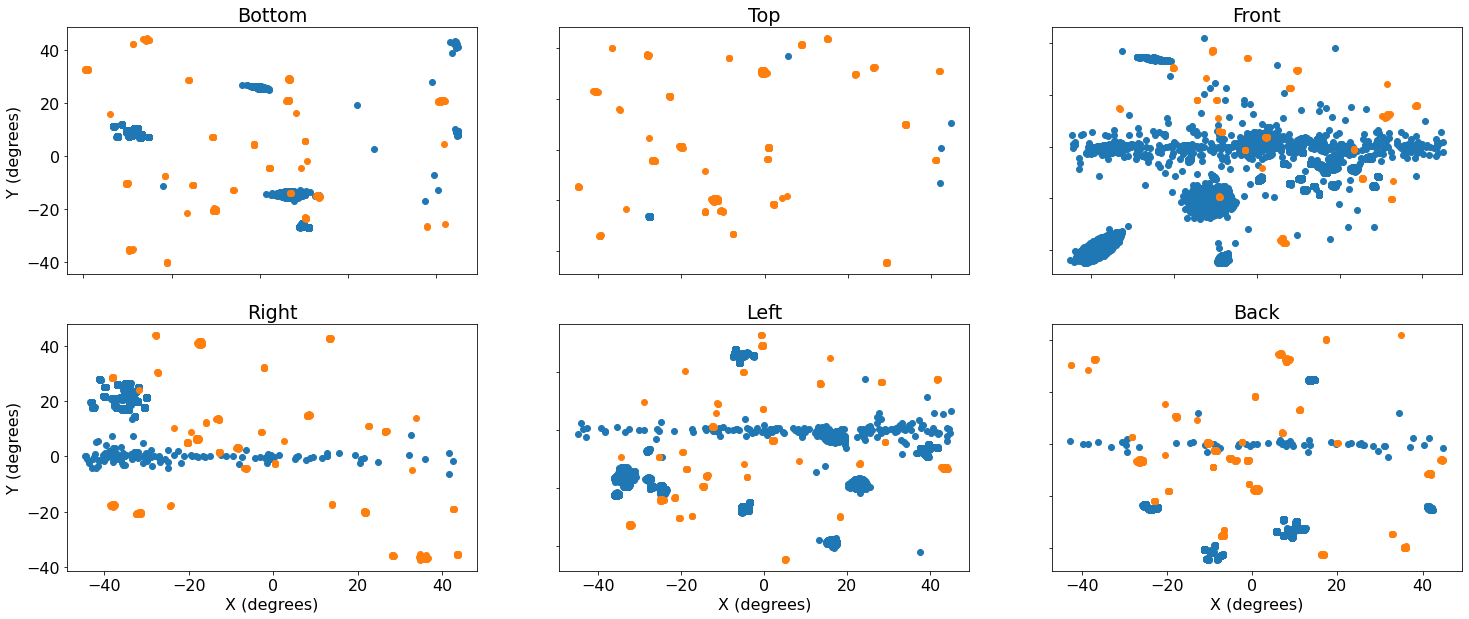

In [549]:
fig, axs = plt.subplots(2, 3, figsize=(25,10))
axs[0, 0].scatter(CB[:,0], CB[:,1])
axs[0, 0].scatter(distantB.X, distantB.Y)
axs[0, 0].set_title('Bottom')
axs[0, 1].scatter(CT[:,0], CT[:,1])
axs[0, 1].scatter(distantT.X, distantT.Y)
axs[0, 1].set_title('Top')
axs[1, 0].scatter(CR[:,0], CR[:,1])
axs[1, 0].scatter(distantR.X, distantR.Y)
axs[1, 0].set_title('Right')
axs[1, 1].scatter(CL[:,0], CL[:,1])
axs[1, 1].scatter(distantL.X, distantL.Y)
axs[1, 1].set_title('Left')
axs[0, 2].scatter(CF[:,0], CF[:,1])
axs[0, 2].scatter(distantF.X, distantF.Y)
axs[0, 2].set_title('Front')
axs[1, 2].scatter(CBA[:,0], CBA[:,1])
axs[1, 2].scatter(distantBA.X, distantBA.Y)
axs[1, 2].set_title('Back')

for ax in axs.flat:
    ax.set(xlabel='X (degrees)', ylabel='Y (degrees)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [550]:
#BOTTOM
ddir = '/Users/eleanor/Downloads/universe_2/'
bottomstars = pd.read_csv(ddir+'Bottom/Star_Data.csv') 
#print(bottomstars.keys())

In [551]:
ddir_stars = '/Users/eleanor/Downloads/universe_2/'
variables = ddir_stars + '/Variable_Star_Data/'
print(variables)

/Users/eleanor/Downloads/universe_2//Variable_Star_Data/


Text(0.5, 1.0, 'Bottom')

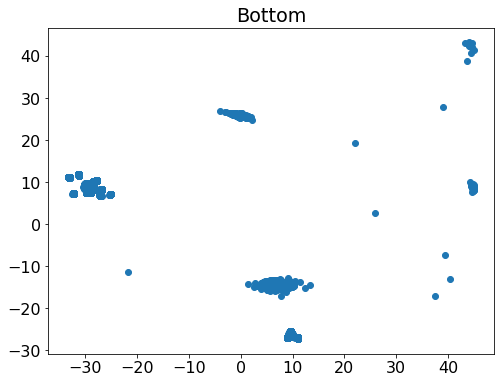

In [552]:
XB=bottomstars.X
YB=bottomstars.Y

CB=np.array(list(zip(bottomstars.X,bottomstars.Y)))
plt.scatter(CB[:,0], CB[:,1])
plt.title('Bottom')

Text(0.5, 1.0, 'Bottom Including Distant Star Data')

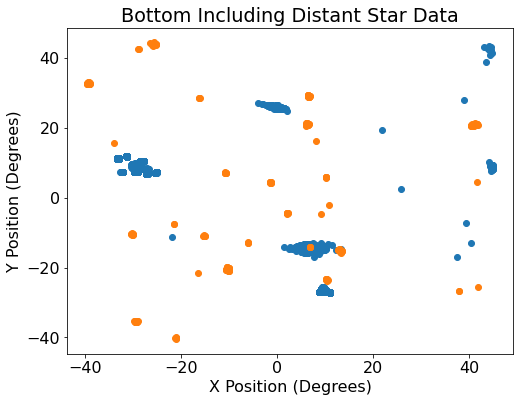

In [553]:
ddir = '/Users/eleanor/Downloads/universe_2/'
distantB = pd.read_csv(ddir+'Bottom/Distant_Galaxy_Data.csv') 

plt.scatter(CB[:,0], CB[:,1])
plt.scatter(distantB.X, distantB.Y)
plt.xlabel('X Position (Degrees)')
plt.ylabel('Y Position (Degrees)')
plt.title('Bottom Including Distant Star Data')

In [554]:
from sklearn.cluster import KMeans
import math

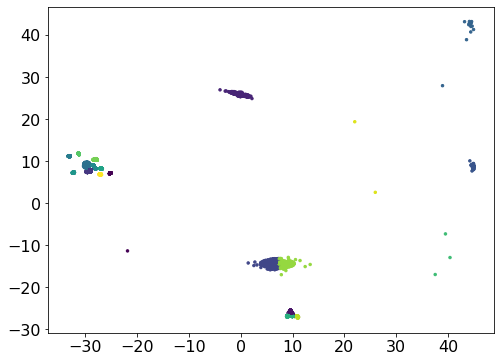

In [555]:
kmeans=KMeans(n_clusters=20)
kmeans.fit(CB)
plt.scatter(CB[:,0], CB[:,1],s=6, c=kmeans.labels_)

In [556]:
xb = kmeans.cluster_centers_ # This

In [557]:
kmeans.labels_

array([ 7,  7,  7, ..., 13, 18, 18], dtype=int32)

In [558]:
xb

array([[-25.18640696,   7.07678518],
       [  9.66132241, -25.9534818 ],
       [ -0.1908594 ,  25.86743985],
       [-29.26305208,   7.56068464],
       [  6.08286881, -14.36282722],
       [ 44.80298   ,   8.66032889],
       [ 43.79152308,  40.96985385],
       [-29.60634515,   8.98371267],
       [-33.10951051,  11.1747334 ],
       [-28.30743698,   8.62799182],
       [-32.27437828,   7.28564368],
       [-26.91410193,   8.21255687],
       [  9.49490917, -26.80003861],
       [ 39.11393333, -12.3963    ],
       [-31.28251018,  11.73160519],
       [-28.04827114,  10.35658308],
       [  8.61702655, -14.31447455],
       [ 10.76941671, -26.96794712],
       [ 23.9636    ,  10.96485   ],
       [-27.11128146,   6.85576685]])

In [559]:
#Top
ddir = '/Users/eleanor/Downloads/universe_2/'
topstars = pd.read_csv(ddir+'Top/Star_Data.csv') 

Text(0.5, 1.0, 'Top')

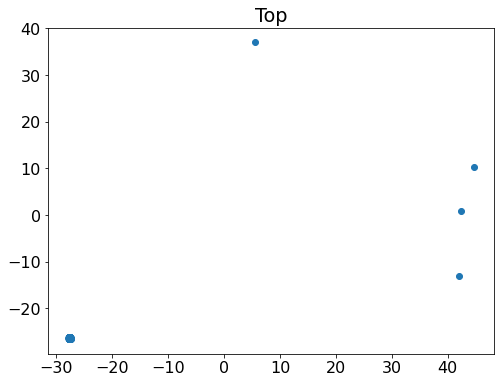

In [560]:
XT=topstars.X
YT=topstars.Y

CT=np.array(list(zip(topstars.X,topstars.Y)))
plt.scatter(CT[:,0], CT[:,1]) #centre of this one is (-27.7,-26.5)
centre=(-27.7,-26.5)
plt.title("Top")

Text(0.5, 1.0, 'Top Including Distant Star Data')

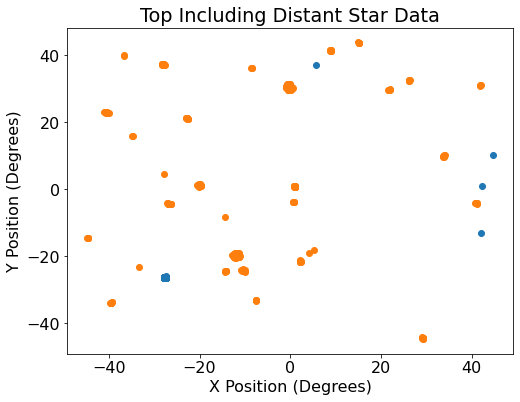

In [561]:
ddir = '/Users/eleanor/Downloads/universe_2/'
distantT = pd.read_csv(ddir+'Top/Distant_Galaxy_Data.csv') 

plt.scatter(CT[:,0], CT[:,1])
plt.scatter(distantT.X, distantT.Y)
plt.xlabel('X Position (Degrees)')
plt.ylabel('Y Position (Degrees)')
plt.title('Top Including Distant Star Data')

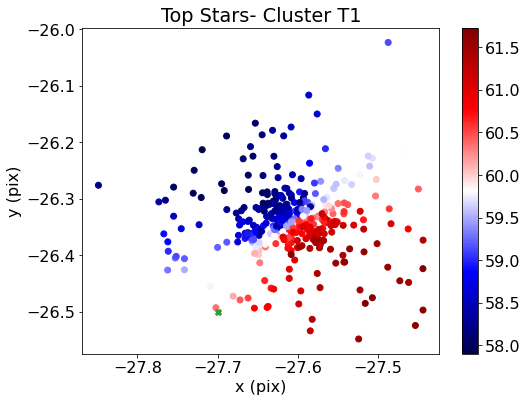

In [562]:
d = np.sqrt((topstars.X-centre[0])** 2 + (topstars.Y - centre[1])**2)
galaxyt1 = topstars[d<1] # filter to only close ones
plt.scatter(galaxyt1.X,galaxyt1.Y,c=galaxyt1.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Top Stars- Cluster T1');


19952.62314968879

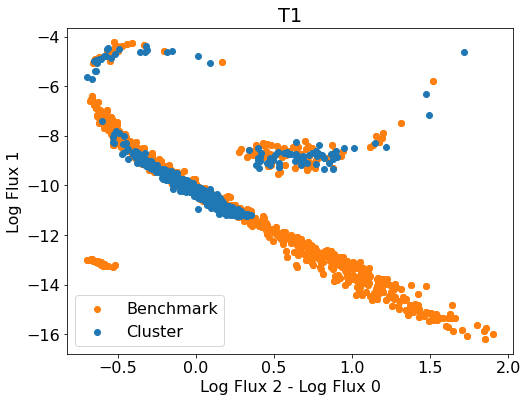

In [563]:
m0, m1, m2 = (np.log10(galaxyt1['BlueF']), 
              np.log10(galaxyt1['GreenF']), 
              np.log10(galaxyt1['RedF'])) 
colour = m2-m0

#st1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])


plt.title('T1')
10**(8.6/2)

In [564]:
# vargalaxy = galaxyt1[galaxyt1['Variable?']==1] #THIS searches through a defined galaxy and pulls all variable stars
# print(vargalaxy) #prints all variables in galaxy
# # galaxyt1.iloc[[24]] #select one star and print its information
# vargalaxy2=pd.merge(galaxyt1,variables,on='Name')
# vargalaxy2.head()

In [565]:
np.log10(1.707000e-16) #-15.767766

-15.767766478885266

In [566]:
#Right
ddir = '/Users/eleanor/Downloads/universe_2/'
rightstars = pd.read_csv(ddir+'Right/Star_Data.csv') 

Text(0.5, 1.0, 'Right')

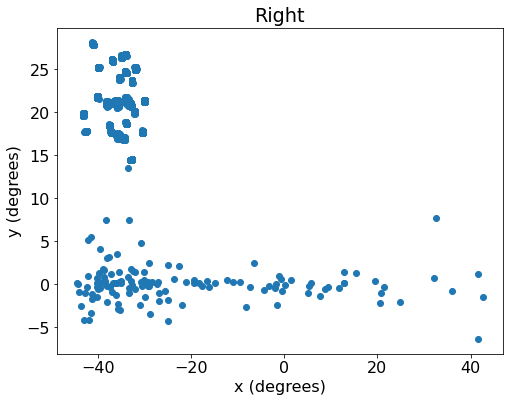

In [567]:
XR=rightstars.X
YR=rightstars.Y

CR=np.array(list(zip(rightstars.X,rightstars.Y)))
plt.scatter(CR[:,0], CR[:,1])
plt.xlabel('x (degrees)')
plt.ylabel('y (degrees)');
plt.title('Right')

Text(0.5, 1.0, 'Right Including Distant Star Data')

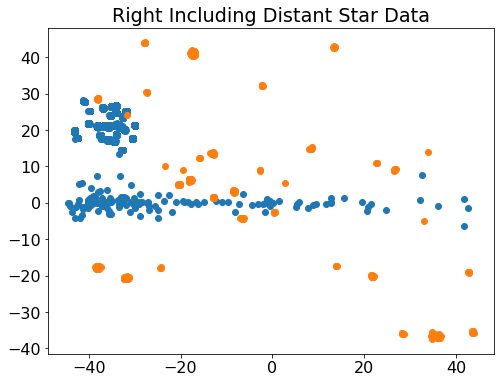

In [568]:
ddir = '/Users/eleanor/Downloads/universe_2/'
distantR = pd.read_csv(ddir+'Right/Distant_Galaxy_Data.csv') 

plt.scatter(CR[:,0], CR[:,1])
plt.scatter(distantR.X, distantR.Y)
plt.title('Right Including Distant Star Data')

array([[-3.66747579e+01,  2.10755905e+01],
       [-3.44441052e+01,  2.44505732e+01],
       [-1.46824400e+01, -8.04733333e-02],
       [-3.04626589e+01,  1.77067373e+01],
       [-4.27783920e+01,  1.85725665e+01],
       [-3.98238289e+01,  2.51889171e+01],
       [ 3.03487091e+01, -4.23809091e-01],
       [-3.91036551e+01,  1.74534694e-01],
       [-3.30035054e+01,  2.08089824e+01],
       [-3.73017602e+01,  1.80531374e+01],
       [-4.00272124e+01,  2.17572629e+01],
       [-3.21645765e+01,  2.45406527e+01],
       [-3.46414152e+01,  1.77057290e+01],
       [-3.68923329e+01,  2.60603419e+01],
       [-3.28145281e+01,  1.44394306e+01],
       [-2.99399392e+01,  2.13046949e+01],
       [-4.10749273e+01,  2.79616048e+01],
       [ 4.50649048e+00, -1.64300000e-01],
       [-3.44378538e+01,  2.65836430e+01],
       [-2.92841941e+01,  2.81382353e-02]])

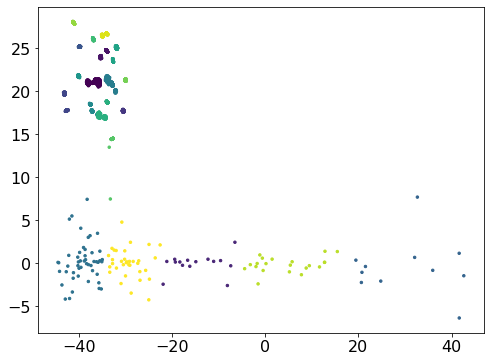

In [569]:
kmeans=KMeans(n_clusters=20)
kmeans.fit(CR)
plt.scatter(CR[:,0], CR[:,1],s=6, c=kmeans.labels_)
xr = kmeans.cluster_centers_
xr

In [570]:
# centre=(-32.16457647,  24.54065275)
# d = np.sqrt((rightstars.X-centre[0])** 2 + (rightstars.Y - centre[1])**2)
# galaxy = rightstars[d<0.6] # filter to only close ones
# plt.scatter(galaxy.X,galaxy.Y,c=galaxy.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
# plt.colorbar()
# plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
# len(galaxy)

array([[-4.25665253e+01,  1.77544818e+01],
       [-3.40109822e+01,  2.46974228e+01],
       [-3.04626589e+01,  1.77067373e+01],
       [-3.73392545e+01,  2.09913549e+01],
       [-3.20312857e+00, -2.00592857e-01],
       [-3.26375341e+01,  2.05557332e+01],
       [-3.98238289e+01,  2.51889171e+01],
       [-4.04793853e+01,  3.49982353e-01],
       [-3.56474458e+01,  1.72365810e+01],
       [ 3.77694667e+01,  1.33633333e-01],
       [-4.00272124e+01,  2.17572629e+01],
       [-3.28145281e+01,  1.44394306e+01],
       [-3.18962483e+01,  2.50747399e+01],
       [-2.82570167e+01, -2.09420833e-01],
       [-3.68923329e+01,  2.60603419e+01],
       [-2.99399392e+01,  2.13046949e+01],
       [-4.10749273e+01,  2.79616048e+01],
       [-3.39194464e+01,  1.87433057e+01],
       [-3.44378538e+01,  2.65836430e+01],
       [-3.73030995e+01,  1.80540275e+01],
       [-4.30769932e+01,  1.97255601e+01],
       [-3.26422437e+01,  2.35898917e+01],
       [-3.61066713e+01,  2.11476046e+01],
       [-3.

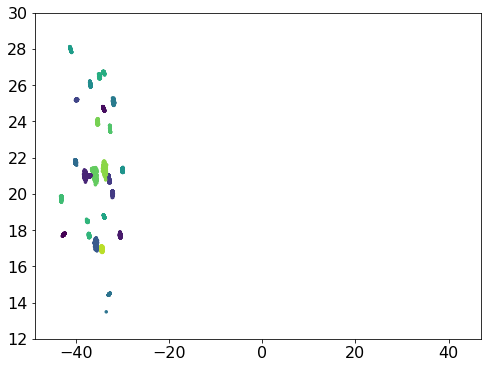

In [571]:
#stars on bottom look like individual, get rid of them to cluster
kmeans=KMeans(n_clusters=30)
kmeans.fit(CR)
plt.scatter(CR[:,0], CR[:,1],s=6, c=kmeans.labels_)
plt.ylim((12,30))
xr = kmeans.cluster_centers_
xr

Text(0.5, 1.0, 'Left')

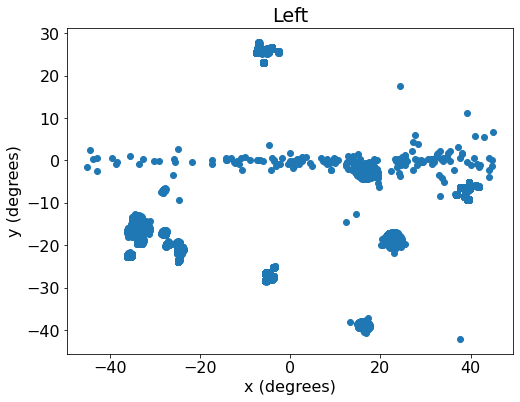

In [572]:
#Left
ddir = '/Users/eleanor/Downloads/universe_2/'
leftstars = pd.read_csv(ddir+'Left/Star_Data.csv') 
XL=rightstars.X
YL=rightstars.Y

CL=np.array(list(zip(leftstars.X,leftstars.Y)))
plt.scatter(CL[:,0], CL[:,1])
plt.xlabel('x (degrees)')
plt.ylabel('y (degrees)');
plt.title('Left')

Text(0.5, 1.0, 'Left Including Distant Star Data')

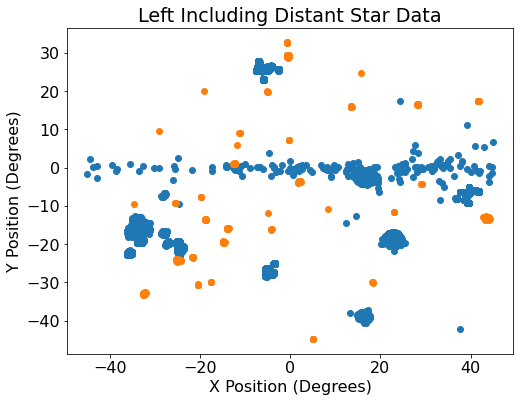

In [573]:
ddir = '/Users/eleanor/Downloads/universe_2/'
distantL = pd.read_csv(ddir+'Left/Distant_Galaxy_Data.csv') 

plt.scatter(CL[:,0], CL[:,1])
plt.scatter(distantL.X, distantL.Y)
plt.xlabel('X Position (Degrees)')
plt.ylabel('Y Position (Degrees)')
plt.title('Left Including Distant Star Data')

array([[ 2.26995028e+01, -1.86979636e+01],
       [-3.22155797e+01, -1.56189823e+01],
       [-6.06750986e+00,  2.56063849e+01],
       [ 3.91673992e+01, -6.64947317e+00],
       [-4.99248585e+00, -2.67126611e+01],
       [ 1.62758186e+01, -3.88832700e+01],
       [-2.79340967e+01, -1.70363878e+01],
       [ 1.24469222e+01, -9.85364444e-01],
       [-2.44003862e+01, -2.10103101e+01],
       [-2.80182774e+01, -7.05107634e+00],
       [-3.32408523e+01, -1.90424709e+01],
       [-1.14094222e+01, -9.94388889e-02],
       [-3.50557854e+01, -1.65026774e+01],
       [-3.56033403e+01, -2.23953141e+01],
       [-2.46694014e+01, -2.34716427e+01],
       [ 3.90437127e+01, -8.85313058e+00],
       [-2.62170615e+00,  2.55692682e+01],
       [-3.42280171e+01, -1.39733599e+01],
       [ 2.78203744e+01,  6.72158140e-01],
       [-6.94576023e+00,  2.76718951e+01],
       [-5.94039840e+00,  2.31311574e+01],
       [-2.71896613e+01, -1.97915410e+01],
       [ 3.77550830e+01, -6.35088251e+00],
       [-4.

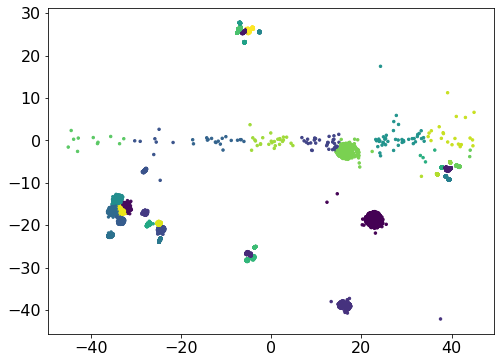

In [574]:
kmeans=KMeans(n_clusters=36)
kmeans.fit(CL)
plt.scatter(CL[:,0], CL[:,1],s=6, c=kmeans.labels_)
xl = kmeans.cluster_centers_
xl

Text(0.5, 1.0, 'Front')

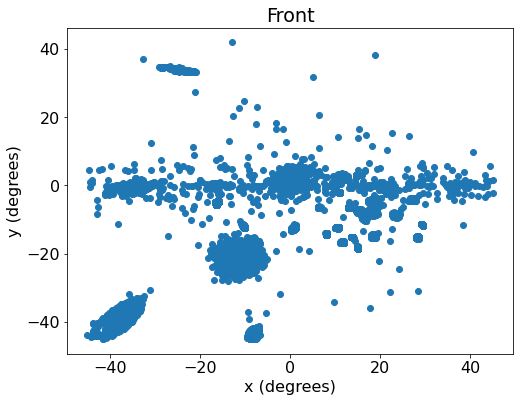

In [575]:
#Front
ddir = '/Users/eleanor/Downloads/universe_2/'
frontstars = pd.read_csv(ddir+'Front/Star_Data.csv') 
XF=frontstars.X
YF=frontstars.Y

CF=np.array(list(zip(frontstars.X,frontstars.Y)))
plt.scatter(CF[:,0], CF[:,1])
plt.xlabel('x (degrees)')
plt.ylabel('y (degrees)');
plt.title('Front')

Text(0.5, 1.0, 'Front Including Distant Star Data')

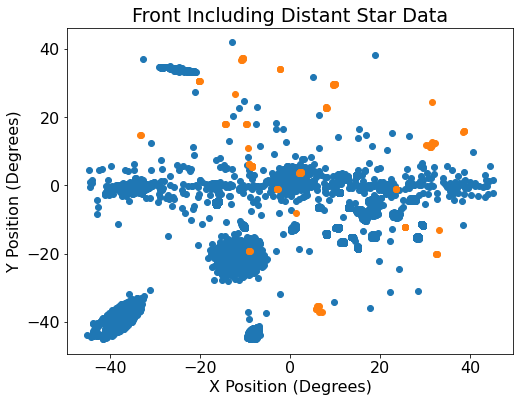

In [576]:
ddir = '/Users/eleanor/Downloads/universe_2/'
distantF = pd.read_csv(ddir+'Front/Distant_Galaxy_Data.csv') 

plt.scatter(CF[:,0], CF[:,1])
plt.scatter(distantF.X, distantF.Y)
plt.xlabel('X Position (Degrees)')
plt.ylabel('Y Position (Degrees)')
plt.title('Front Including Distant Star Data')

array([[  6.49279607,  -6.41994747],
       [-13.02631781, -22.94362625],
       [-24.92902417,  33.94255564],
       [ 27.39007569,  -3.87947451],
       [-10.3113429 , -11.96384487],
       [-38.4352768 , -39.66092507],
       [-35.12068182,  -0.68912874],
       [ 18.80678808,  -5.03972127],
       [ -8.17822995, -43.41380792],
       [ 13.72365175, -16.84224364],
       [-16.34304551,  -4.97597509],
       [ 14.87282378,   2.92745056],
       [  0.06017968,   2.00958835],
       [  8.03036244, -14.22906182],
       [ 28.2862198 , -15.31599171],
       [ 14.18003028,  -6.98415521],
       [  0.80429641, -12.51456459],
       [ 18.44369876,  -7.84923874],
       [-10.70469846, -20.07890384],
       [ 21.07885895,  -0.57585786],
       [ 23.47184846,  -8.66840805],
       [ 10.91432593,  -2.0484425 ],
       [ 18.51823445, -14.98454781],
       [ 10.45531629, -12.38422236],
       [ 29.31678674, -11.56881882],
       [ 38.63130909,   0.31399091],
       [ 16.62343694,  -9.97873221],
 

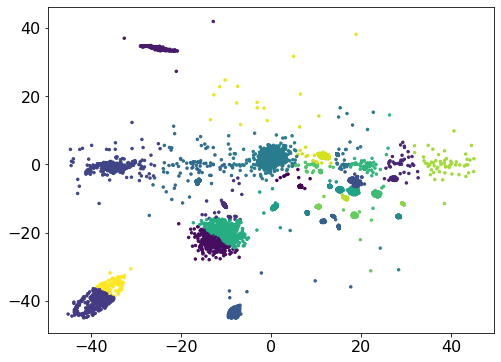

In [577]:
kmeans=KMeans(n_clusters=30)
kmeans.fit(CF)
plt.scatter(CF[:,0], CF[:,1],s=6, c=kmeans.labels_)
xf = kmeans.cluster_centers_
xf

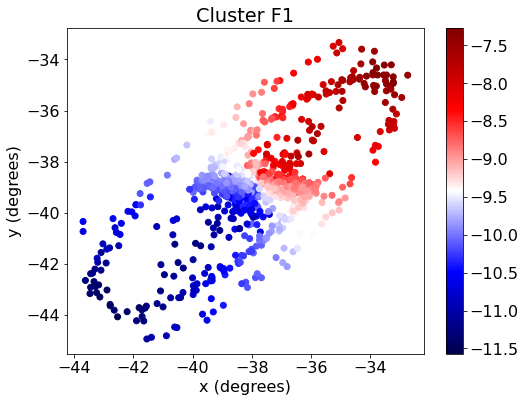

In [712]:
centre = (-37.88745448, -38.98062688)
d = np.sqrt((frontstars.X-centre[0])** 2 + (frontstars.Y - centre[1])**2)
galaxyf1 = frontstars[d<7] # filter to only close ones
plt.scatter(galaxyf1.X,galaxyf1.Y,c=galaxyf1.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
#plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (degrees)')
plt.ylabel('y (degrees)')
plt.title('Cluster F1');


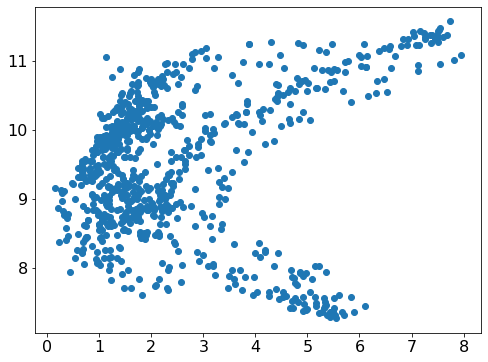

In [579]:

A = galaxyf1.X-centre[0]
# print (A)

B = galaxyf1.Y-centre[0]
# print(B)

R = np.sqrt((A**2) + (B**2))
# print(R)

plt.scatter(abs(R),abs(galaxyf1.RadialVelocity))

1000.0

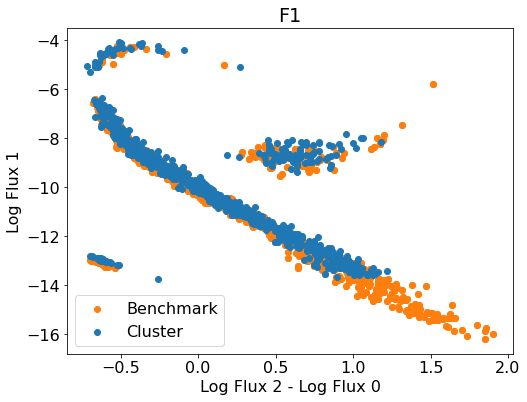

In [580]:
m0, m1, m2 = (np.log10(galaxyf1['BlueF']), 
              np.log10(galaxyf1['GreenF']), 
              np.log10(galaxyf1['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])

plt.title('F1')
10**(6/2)

(626, 9)

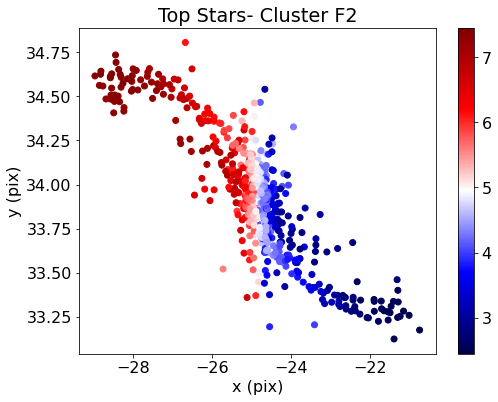

In [581]:
centre = (-24.83723476,  33.87115245)
d = np.sqrt((frontstars.X-centre[0])** 2 + (frontstars.Y - centre[1])**2)
galaxyf2 = frontstars[d<7] # filter to only close ones
plt.scatter(galaxyf2.X,galaxyf2.Y,c=galaxyf2.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
#plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Top Stars- Cluster F2');
np.shape(galaxyf2)

1778.2794100389228

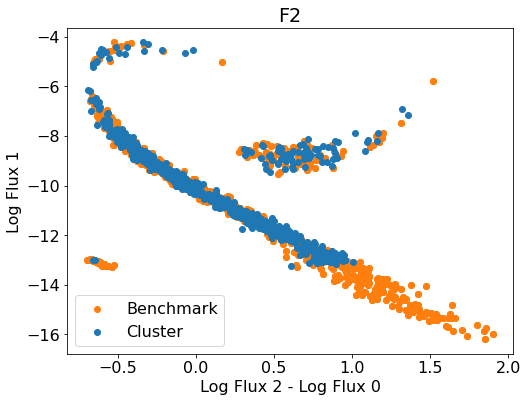

In [582]:
m0, m1, m2 = (np.log10(galaxyf2['BlueF']), 
              np.log10(galaxyf2['GreenF']), 
              np.log10(galaxyf2['RedF'])) 
colour = m2-m0

#sf2 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+6.5,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
10**(6.5/2)
plt.title("F2")
10**(6.5/2)

922

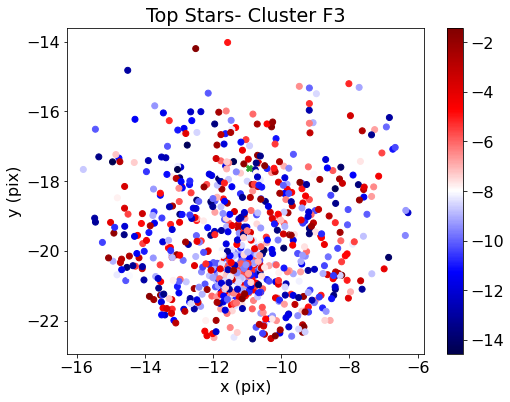

In [583]:
centre = (-10.94783942, -17.60958602)
d = np.sqrt((frontstars.X-centre[0])** 2 + (frontstars.Y - centre[1])**2)
galaxyf3 = frontstars[d<5] # filter to only close ones
plt.scatter(galaxyf3.X,galaxyf3.Y,c=galaxyf3.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Top Stars- Cluster F3');
len(galaxyf3)

3162.2776601683795

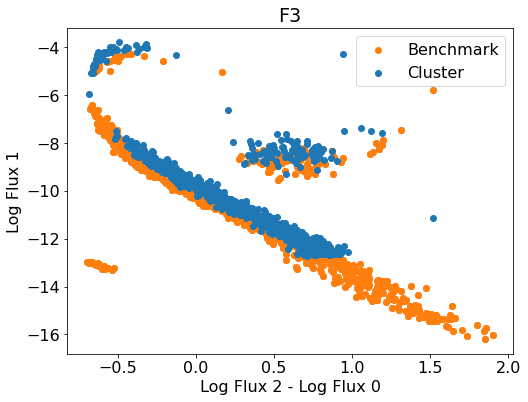

In [584]:
m0, m1, m2 = (np.log10(galaxyf3['BlueF']), 
              np.log10(galaxyf3['GreenF']), 
              np.log10(galaxyf3['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+7,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title("F3")
10**(7/2)

804

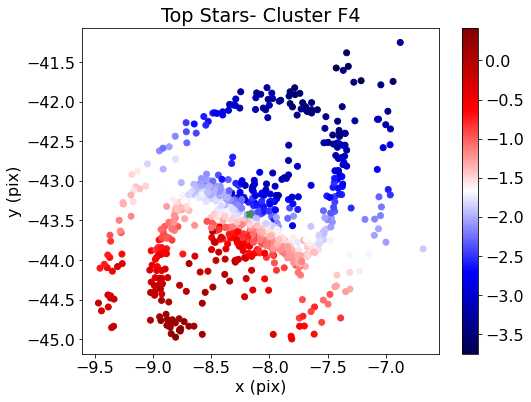

In [585]:
centre = (-8.17822995, -43.41380792)
d = np.sqrt((frontstars.X-centre[0])** 2 + (frontstars.Y - centre[1])**2)
galaxyf4 = frontstars[d<4] # filter to only close ones
plt.scatter(galaxyf4.X,galaxyf4.Y,c=galaxyf4.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Top Stars- Cluster F4');
len(galaxyf4)

3162.2776601683795

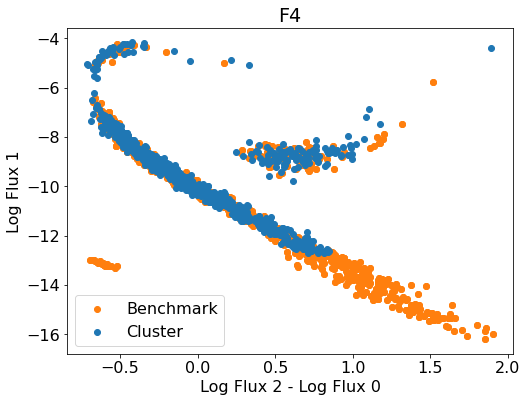

In [586]:
m0, m1, m2 = (np.log10(galaxyf4['BlueF']), 
              np.log10(galaxyf4['GreenF']), 
              np.log10(galaxyf4['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+7,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('F4')
10**(7/2)

1000

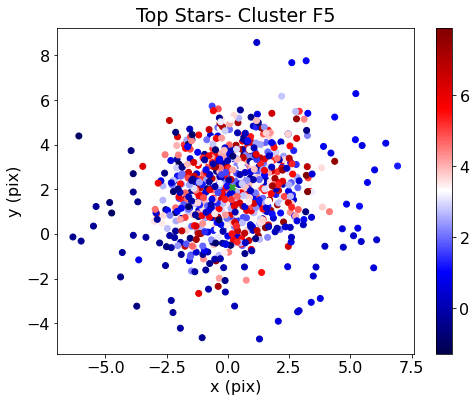

In [587]:
centre = (0.16062933,   2.11029051)
d = np.sqrt((frontstars.X-centre[0])** 2 + (frontstars.Y - centre[1])**2)
galaxyf5 = frontstars[d<7] # filter to only close ones
plt.scatter(galaxyf5.X,galaxyf5.Y,c=galaxyf5.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Top Stars- Cluster F5');
#galaxyf5
len(galaxyf5)

1778.2794100389228

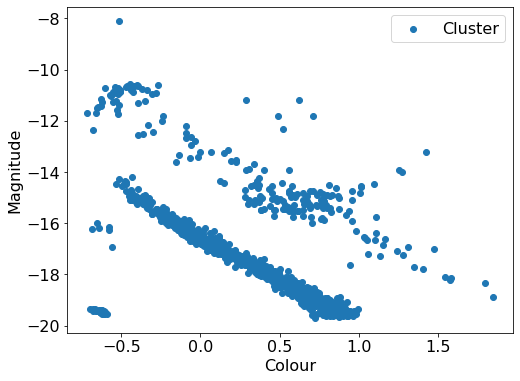

In [705]:
m0, m1, m2 = (np.log10(galaxyf5['BlueF']), 
              np.log10(galaxyf5['GreenF']), 
              np.log10(galaxyf5['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1,color='C0')

plt.ylabel('Magnitude')
plt.xlabel('Colour')

plt.legend([h,s],['Benchmark','Cluster'])
# plt.title('Local Galaxy')
10**(6.5/2)
# 10**(0.3/2)

Text(0.5, 1.0, 'Back')

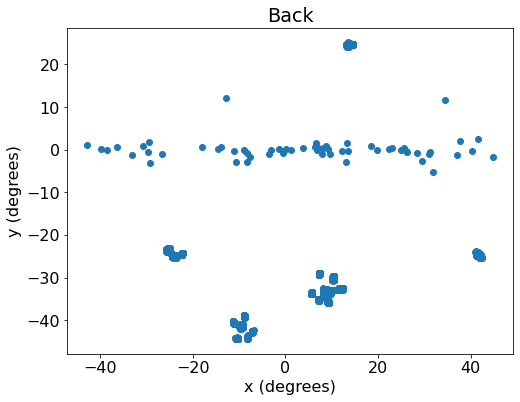

In [589]:
#Back
## Haven't got to it yet but i have clustered the stars in this galaxy and will find all the distances soon
## I've done this and the top image so if its cool im gonna leave the other views to you guys
ddir = '/Users/eleanor/Downloads/universe_2/'
backstars = pd.read_csv(ddir+'Back/Star_Data.csv') 
#XBA=backstars.X[backstars.Y<-10&backstars.Y>19]
XBA=backstars.X
YBA=backstars.Y

CBA=np.array(list(zip(backstars.X,backstars.Y)))
plt.scatter(CBA[:,0], CBA[:,1])
plt.xlabel('x (degrees)')
plt.ylabel('y (degrees)');
plt.title('Back')

Text(0.5, 1.0, 'Back Including Distant Star Data')

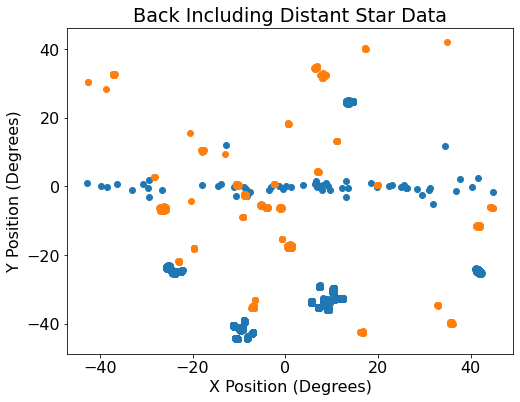

In [590]:
ddir = '/Users/eleanor/Downloads/universe_2/'
distantBA = pd.read_csv(ddir+'Back/Distant_Galaxy_Data.csv') 

plt.scatter(CBA[:,0], CBA[:,1])
plt.scatter(distantBA.X, distantBA.Y)
plt.xlabel('X Position (Degrees)')
plt.ylabel('Y Position (Degrees)')
plt.title('Back Including Distant Star Data')

(13645,) (13645,)


Text(0.5, 1.0, 'Back-Reduced')

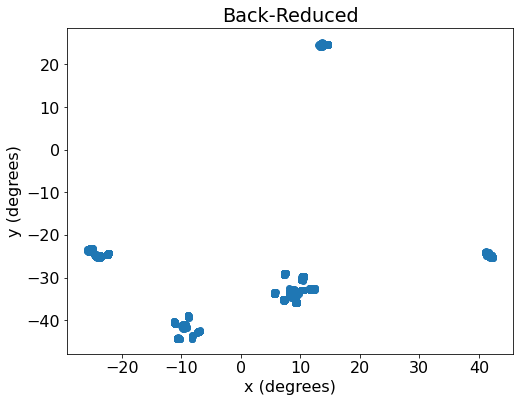

In [591]:
XBA=backstars.X[(backstars.Y<-10)|(backstars.Y>19)]
YBA=backstars.Y[(backstars.Y<-10)|(backstars.Y>19)]
# XBA=backstars.X[(backstars.Y>19)]
# YBA=backstars.Y[(backstars.Y>19)]
print(np.shape(YBA), np.shape(XBA))
CBA=np.array(list(zip(XBA,YBA)))
plt.scatter(CBA[:,0], CBA[:,1])
plt.xlabel('x (degrees)')
plt.ylabel('y (degrees)');
plt.title('Back-Reduced')

array([[-24.42321423, -24.76371036],
       [  8.76339623, -33.63173543],
       [ 13.56565183,  24.58746981],
       [ -7.08522101, -42.68815294],
       [ 41.65401492, -24.66319513],
       [-10.51791533, -44.26506245],
       [ 10.42071839, -29.80672286],
       [ -9.51475882, -41.44602602],
       [  7.23939239, -35.28150299],
       [ 12.25934408, -32.65742111],
       [  5.71196328, -33.68406677],
       [ 10.37419578, -32.92942329],
       [-22.32923073, -24.51114134],
       [  7.38684234, -29.09425255],
       [ -8.79838502, -39.13926435],
       [  9.26548462, -35.81633573],
       [-11.13208013, -40.58794292],
       [ -8.14270442, -43.96367691],
       [-25.29921244, -23.51684139],
       [-23.7411227 , -25.02280837],
       [ 14.52497384,  24.71534616],
       [ 10.28218743, -30.58019354],
       [ 11.69323639, -32.71761962]])

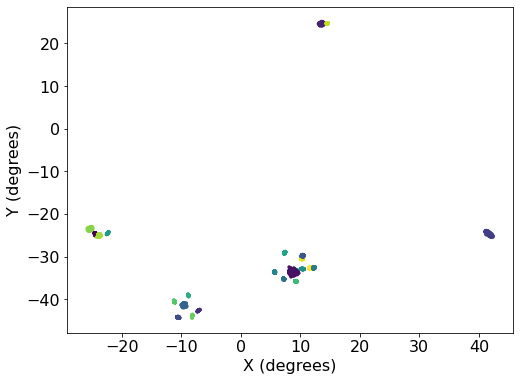

In [592]:
kmeans=KMeans(n_clusters=23)
kmeans.fit(CBA)
plt.scatter(CBA[:,0], CBA[:,1],s=6, c=kmeans.labels_)
# plt.title('Clustered Galaxies in Back View - Reduced')
plt.ylabel('Y (degrees)')
plt.xlabel('X (degrees)')
xba = kmeans.cluster_centers_
xba

657

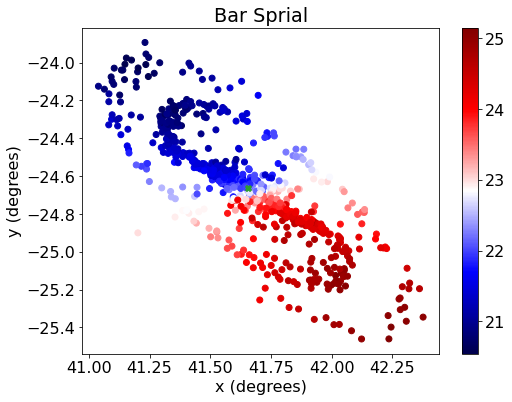

In [593]:
centre = (41.65401492, -24.66319513)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba1 = backstars[d<7] # filter to only close ones
plt.scatter(galaxyba1.X,galaxyba1.Y,c=galaxyba1.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (degrees)')
plt.ylabel('y (degrees)')
plt.title('Bar Sprial');

#find rotation curve
#semi major and semi minor axes rv vs position along semi major

#no stellar masses
#cdf of stars as function of distance in curve, enclosed mass (kelper 3rd or virial theorem), either dark matter or black hole
#lots of mass in origin is black hole
#black hole makes stars travel fast around it due to gravitational pull
len(galaxyba1)

8912.509381337459

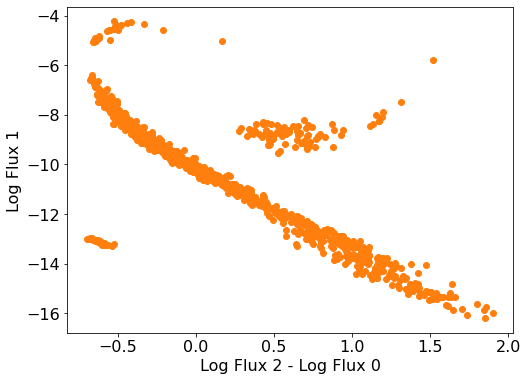

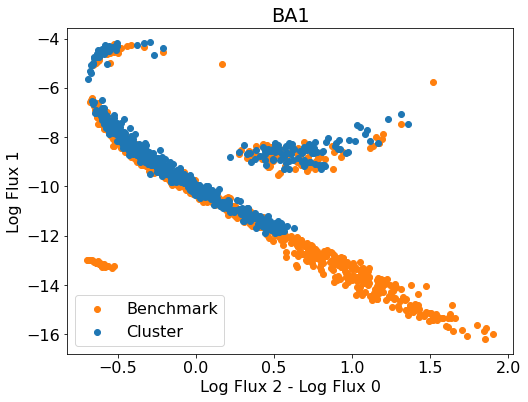

In [594]:
m0, m1, m2 = (np.log10(galaxyba1['BlueF']), 
              np.log10(galaxyba1['GreenF']), 
              np.log10(galaxyba1['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')
# plt.title('Colour-Magnitude Diagram (Benchmark)')

fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+7.9,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA1')
10**(7.9/2)



In [595]:
#galaxyba1

In [596]:
import sys
print(sys.version)
import numpy as np # for maths 
import matplotlib # for plotting 
import matplotlib as mpl
import matplotlib.pyplot as plt

from tqdm import tqdm # tqdm is a package that lets you make progress bars to see how a loop is going

import os 

import pandas as pd # pandas is a popular library in industry for manipulating large data tables

from astropy.timeseries import LombScargle

# configure notebook for plotting
%matplotlib inline

# mpl.style.use('seaborn-colorblind') # colourblind-friendly colour scheme

# subsequent lines default plot settings
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['figure.figsize']=(8.0,6.0)   
matplotlib.rcParams['font.size']=16              
matplotlib.rcParams['savefig.dpi']= 300             

import warnings
warnings.filterwarnings('ignore')

3.9.18 (main, Sep 11 2023, 08:38:23) 
[Clang 14.0.6 ]


In [597]:
#import variable star data
ddir_stars = '/Users/eleanor/Downloads/universe_2/' # point this to where you unzip your data!

ddir = ddir_stars + 'Variable_Star_Data/'


In [598]:
fname = 'BackS131470.csv' # put your filename here
#fname = 'FrontS036691.csv' # put your filename here

data = pd.read_csv(ddir+fname) # load in CSV data as a Pandas object
print(data.keys()) # see what's in it
time, flux = data.Time, data.NormalisedFlux # just extract the columns as variables
dt = np.median(np.diff(time))
print('Nyquist Limit',0.5/dt,'cycles per hour') # can't get frequencies higher than the Nyquist limit

Index(['Time', 'NormalisedFlux'], dtype='object')
Nyquist Limit 0.5 cycles per hour


In [599]:
LS = LombScargle(time,flux) # initialize a Lomb-Scargle algorithm from Astropy
freqs = np.linspace(1/100,0.45,10000) # frequency grid shouldn't go higher than Nyquist limit
power = LS.power(freqs) # calculate LS power

In [600]:
import glob # this package lets you search for filenames

fnames = glob.glob(ddir+'*.csv')

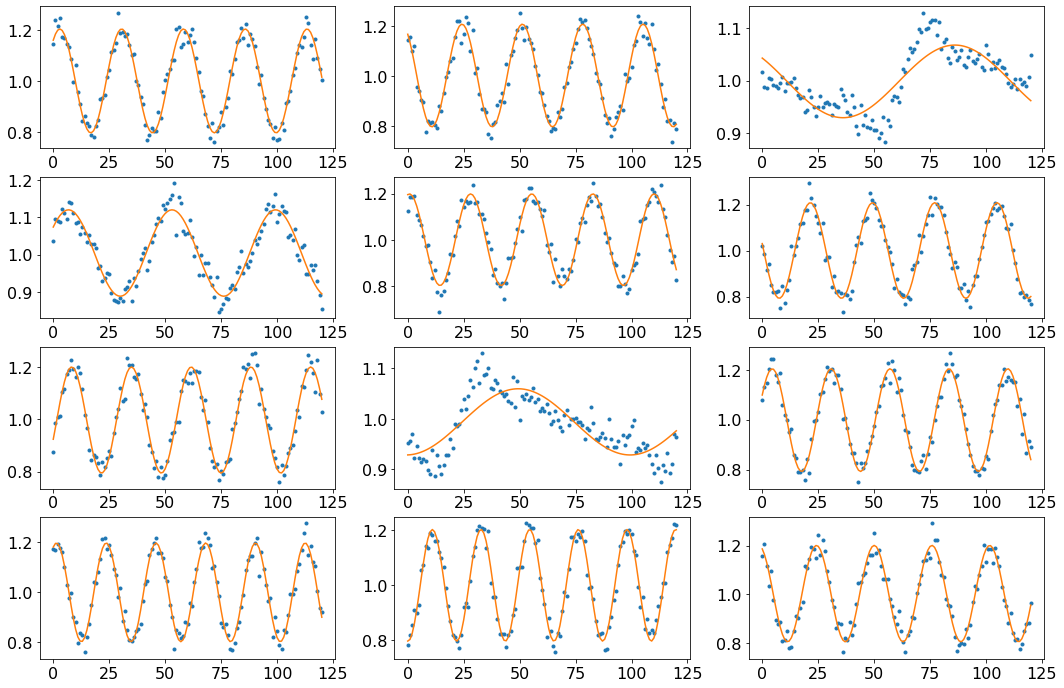

In [601]:
freqs = np.linspace(1/100,0.49,10000) # frequency grid shouldn't go higher than Nyquist limit
periods = [] # start an empty list to hold the period 

fig, axes = plt.subplots(4,3,figsize=(18,12))
# for fname, ax in zip(fnames[:12], axes.ravel()): # you can loop over two things
for fname, ax in zip(fnames, axes.ravel()): # you can loop over two things
    data = pd.read_csv(fname) # load in CSV data as a Pandas object

    time, flux = data.Time, data.NormalisedFlux # just extract the columns as variables

    LS = LombScargle(time,flux) # initialize a Lomb-Scargle
    power = LS.power(freqs) # calculate LS power 
    bestfreq = freqs[np.argmax(power)] # which frequency has the highest Lomb-Scargle power?
    
    pred = LS.model(time,bestfreq) # make a sine wave prediction at the best frequency
    ax.plot(time,flux,'.')
    ax.plot(time,pred) # plot the model over the data
    
    periods.append(1/bestfreq) # add each period to the list
    
periods = np.array(periods) # turn it from a list to an array

In [602]:
freqs = np.linspace(1/100,0.45,10000) # frequency grid shouldn't go higher than Nyquist limit
periods = [] # start an empty list to hold the period 
names = []

for fname in tqdm(fnames): # tqdm is a package that gives you a progress bar - neat! 
    data = pd.read_csv(fname) # load in CSV data as a Pandas object

    time, flux = data.Time, data.NormalisedFlux # just extract the columns as variables

    LS = LombScargle(time,flux) # initialize a Lomb-Scargle
    power = LS.power(freqs) # calculate LS power 
    bestfreq = freqs[np.argmax(power)] # which frequency has the highest Lomb-Scargle power?
    
    pred = LS.model(time,bestfreq) # make a sine wave prediction at the best frequency
    
    periods.append(1/bestfreq) # add each period to the list
    names.append(os.path.basename(fname).strip('.csv')) # os.path.basename gets rid of directories and gives you the filename; then we strip '.csv'
    
periods = np.array(periods) # turn it from a list to an array

100%|███████████████████████████████████████| 7085/7085 [01:15<00:00, 94.00it/s]


In [603]:
import glob # this package lets you search for filenames
import os

variables = pd.DataFrame({'Name':names,'Period':periods}) # you can turn a dictionary into a dataframe like this
# variables.Name = variables.Name.astype('|S') # have to do this so that it knows the names are strings
variables.Name = variables.Name.astype('string') 

In [604]:
vargalaxyba1=galaxyba1[galaxyba1['Variable?']==1]
#print(np.shape(vargalaxyba1))
#print(vargalaxyba1)
#print(bytes('BackS141889','utf-8'))
#print()

In [605]:
vargalaxyba1P=pd.merge(galaxyba1,variables,on='Name')
vargalaxyba1P.head()

Name        X        Y         BlueF        GreenF          RedF  \
0  BackS141889  41.7002 -24.6798  8.289000e-13  6.917000e-13  3.484000e-13   
1  BackS142010  41.7346 -24.7190  3.412000e-17  8.825000e-17  4.451000e-16   
2  BackS142145  41.6407 -24.5254  1.567000e-16  3.795000e-16  1.689000e-15   
3  BackS142177  41.7519 -24.7701  2.488000e-16  6.973000e-16  4.230000e-15   
4  BackS142186  41.5726 -24.6223  8.640000e-13  6.550000e-13  2.718000e-13   

   Parallax  RadialVelocity  Variable?      Period  
0       0.0           22.39          1   41.374602  
1       0.0           23.44          1  100.000000  
2      -0.0           21.34          1  100.000000  
3      -0.0           23.94          1   92.660550  
4      -0.0           21.55          1   41.525811

In [606]:
vargalaxy2=pd.merge(galaxyt1,variables,on='Name')
vargalaxy2.head()

Name        X        Y         BlueF        GreenF          RedF  \
0  TopS083338 -27.5179 -26.3541  5.001000e-17  1.707000e-16  1.548000e-15   
1  TopS083475 -27.6169 -26.3581  3.359000e-18  9.310000e-18  5.565000e-17   
2  TopS083499 -27.5679 -26.3742  4.822000e-18  1.278000e-17  6.813000e-17   
3  TopS083538 -27.6030 -26.3217  5.390000e-18  1.076000e-17  3.309000e-17   
4  TopS083595 -27.5809 -26.3723  6.611000e-14  6.365000e-14  4.341000e-14   

   Parallax  RadialVelocity  Variable?      Period  
0     0.001           61.26          1   90.809191  
1    -0.000           59.93          1  100.000000  
2    -0.000           61.49          1  100.000000  
3    -0.001           59.04          1  100.000000  
4     0.000           61.39          1   42.536266

In [607]:
np.log10(9.310000e-18)
# mag -17.031050319018657 #period 100

-17.031050319018657

In [608]:
m0, m1, m2 = np.log10(galaxyba1['BlueF']), np.log10(galaxyba1['GreenF']), np.log10(galaxyba1['RedF']) 
colour = m2-m0
abs_mag = m1 + 2*np.log10(1./galaxyba1.Parallax) 

v0, v1, v2 = np.log10(vargalaxyba1P['BlueF']), np.log10(vargalaxyba1P['GreenF']), np.log10(vargalaxyba1P['RedF']) 
variable_colour = v2-v0
abs_mag_v = v1 + 2*np.log10(1./vargalaxyba1P.Parallax)

Text(0.5, 0, 'Log Flux 2 - Log Flux 0')

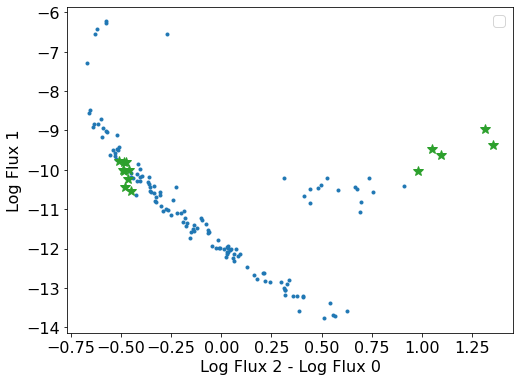

In [609]:
s = plt.plot(colour,abs_mag,'.C0')
h = plt.plot(variable_colour,abs_mag_v,'.C2',marker='*',markersize=10)

    
plt.legend([s, h],['Steady','Variable'])
plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

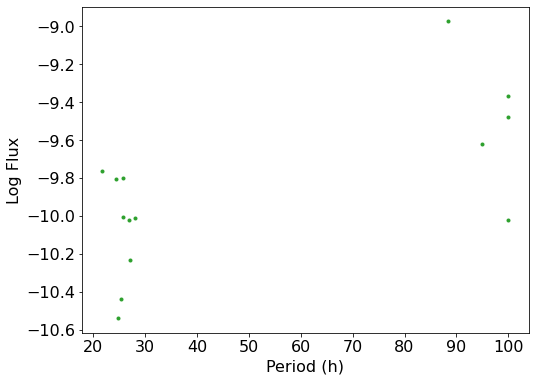

In [610]:
###this doesnt work nicely
##working in period luminosity notebook
plt.plot(vargalaxyba1P.Period,abs_mag_v,'.',color='C2')
plt.xlabel('Period (h)')
plt.ylabel('Log Flux');

In [611]:
#plt.plot(vargalaxyba1P.Period,abs_mag_v,'.',color='C2')
#vargalaxyba1P.Period=vargalaxyba1P.Period[(vargalaxyba1P.Period<40)]
#abs_mag_v=vargalaxyba1P.Period[(vargalaxyba1P.Period<40)]
#plt.xlabel('Period (h)')
#plt.ylabel('Log Flux');

474

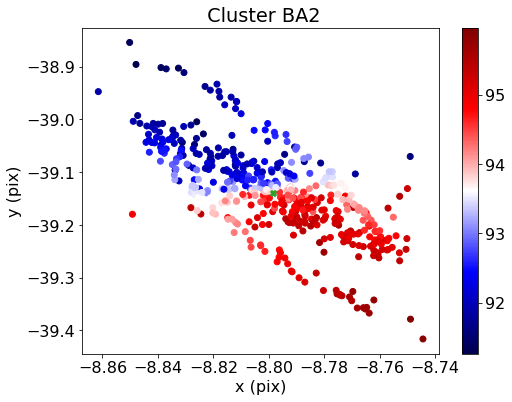

In [612]:
centre = (-8.79838502, -39.139264351)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba2 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba2.X,galaxyba2.Y,c=galaxyba2.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title(' Cluster BA2');
len(galaxyba2)

25118.864315095823

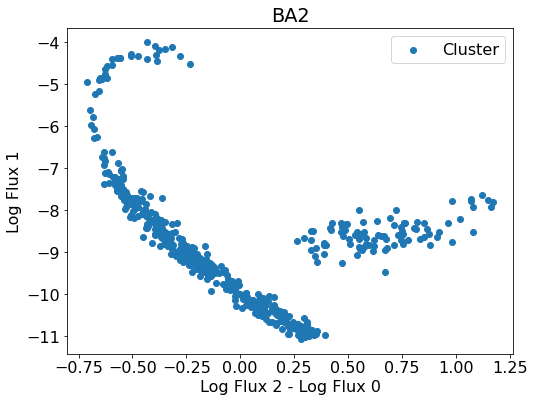

In [613]:
m0, m1, m2 = (np.log10(galaxyba2['BlueF']), 
              np.log10(galaxyba2['GreenF']), 
              np.log10(galaxyba2['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.8,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA2')
10**(8.8/2)

731

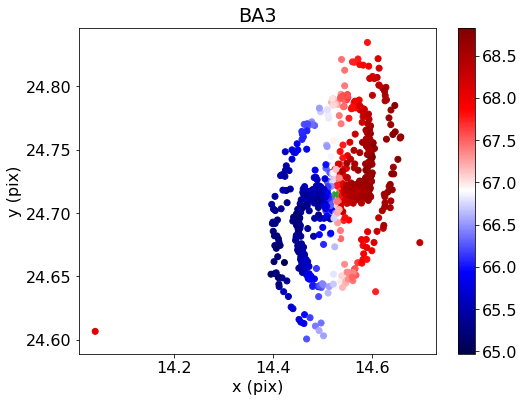

In [614]:
centre = (14.52497384,  24.71534616)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba3 = backstars[d<0.5] # filter to only close ones
plt.scatter(galaxyba3.X,galaxyba3.Y,c=galaxyba3.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA3');
len(galaxyba3)

25118.864315095823

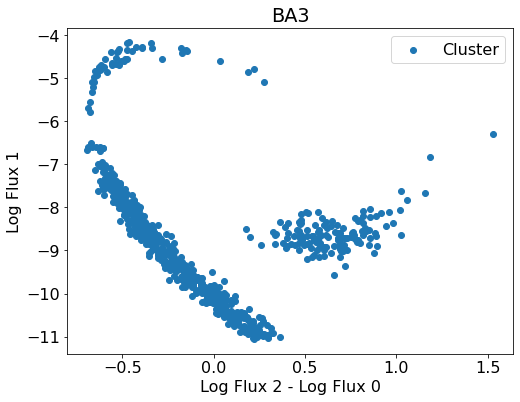

In [615]:
m0, m1, m2 = (np.log10(galaxyba3['BlueF']), 
              np.log10(galaxyba3['GreenF']), 
              np.log10(galaxyba3['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.8,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA3')
10**(8.8/2)

793

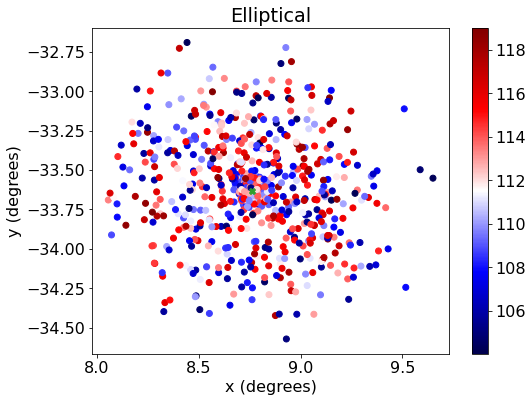

In [616]:
centre = (8.76339623, -33.63173543)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba4 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba4.X,galaxyba4.Y,c=galaxyba4.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (degrees)')
plt.ylabel('y (degrees)')
plt.title('Elliptical');
len(galaxyba4)

793

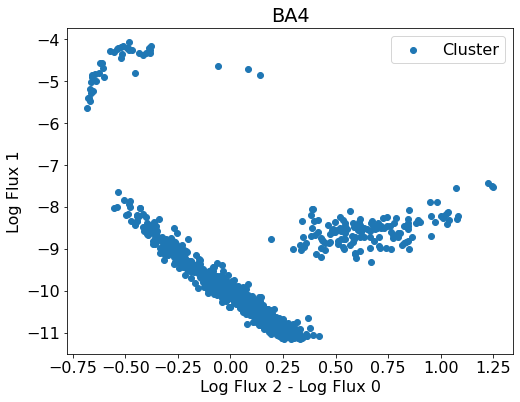

In [617]:
m0, m1, m2 = (np.log10(galaxyba4['BlueF']), 
              np.log10(galaxyba4['GreenF']), 
              np.log10(galaxyba4['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.7,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA4')
10**(8.7/2)
len(galaxyba4)

704

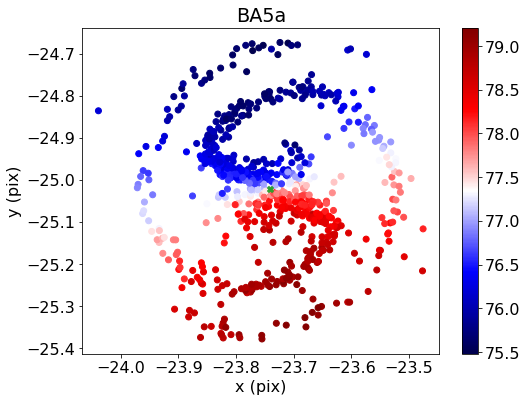

In [618]:
centre = (-23.7411227 , -25.02280837)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba5a = backstars[d<0.5] # filter to only close ones
plt.scatter(galaxyba5a.X,galaxyba5a.Y,c=galaxyba5a.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA5a')
len(galaxyba5a)

11220.18454301963

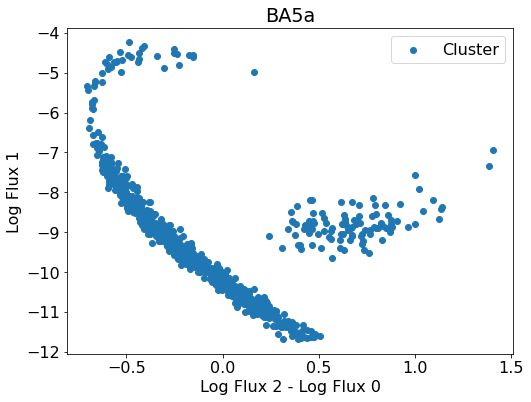

In [619]:
m0, m1, m2 = (np.log10(galaxyba5a['BlueF']), 
              np.log10(galaxyba5a['GreenF']), 
              np.log10(galaxyba5a['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.1,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA5a')
10**(8.1/2)

678

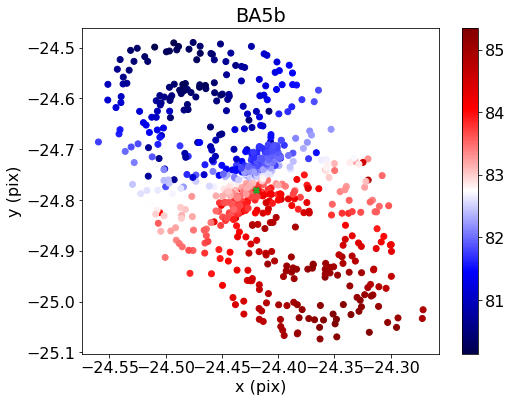

In [620]:
centre = (-24.42 , -24.78)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba5b = backstars[d<0.3] # filter to only close ones
plt.scatter(galaxyba5b.X,galaxyba5b.Y,c=galaxyba5b.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA5b')
len(galaxyba5b)

12589.254117941662

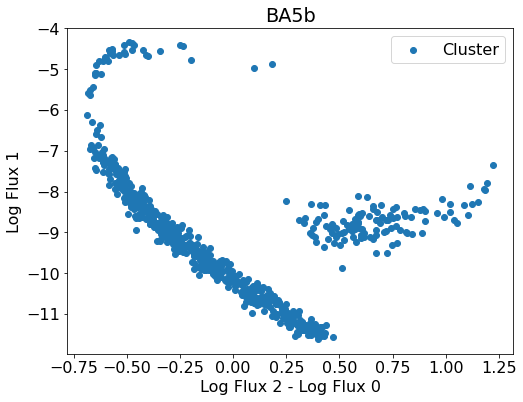

In [621]:
m0, m1, m2 = (np.log10(galaxyba5b['BlueF']), 
              np.log10(galaxyba5b['GreenF']), 
              np.log10(galaxyba5b['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.2,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA5b')
10**(8.2/2)

595

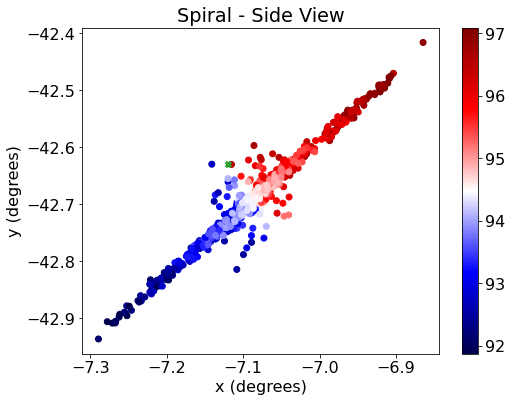

In [622]:
centre = (-7.12, -42.63)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba6 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba6.X,galaxyba6.Y,c=galaxyba6.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (degrees)')
plt.ylabel('y (degrees)')
plt.title('Spiral - Side View');
len(galaxyba6)

22387.21138568338

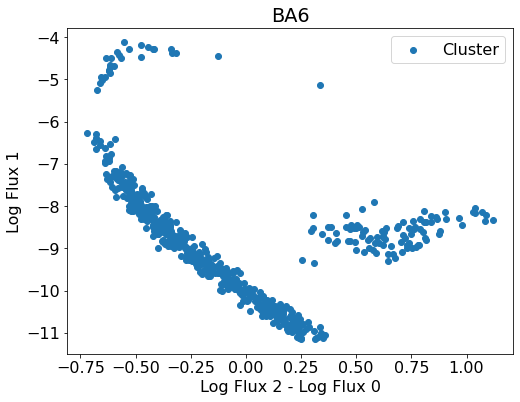

In [623]:
m0, m1, m2 = (np.log10(galaxyba6['BlueF']), 
              np.log10(galaxyba6['GreenF']), 
              np.log10(galaxyba6['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.7,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA6')
10**(8.7/2)

560

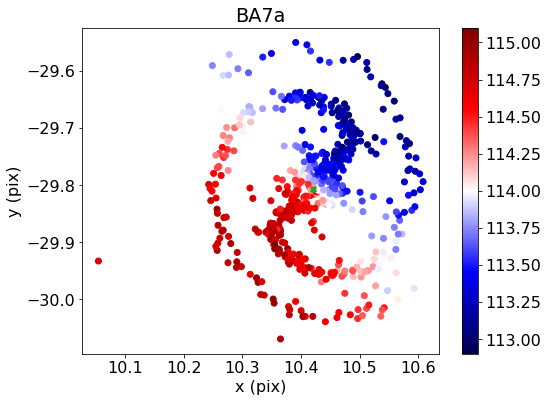

In [624]:
centre = (10.42071839, -29.80672286)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba7a = backstars[d<0.5] # filter to only close ones
plt.scatter(galaxyba7a.X,galaxyba7a.Y,c=galaxyba7a.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA7a');
len(galaxyba7a)

19952.62314968879

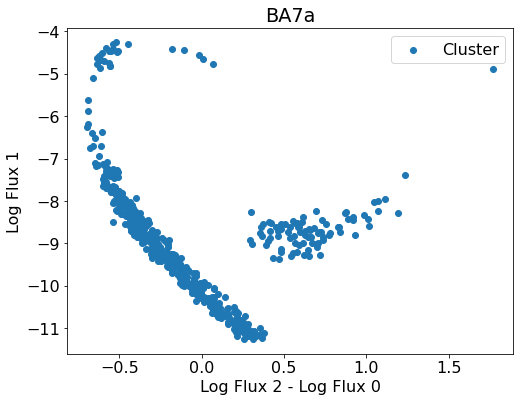

In [625]:
m0, m1, m2 = (np.log10(galaxyba7a['BlueF']), 
              np.log10(galaxyba7a['GreenF']), 
              np.log10(galaxyba7a['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA7a')
10**(8.6/2)

573

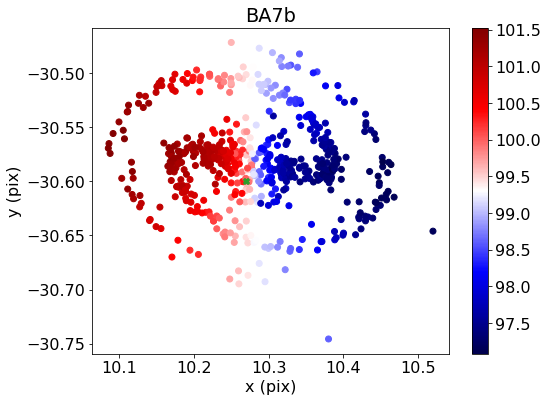

In [626]:
centre = (10.27 , -30.60)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba7b = backstars[d<0.49] # filter to only close ones
plt.scatter(galaxyba7b.X,galaxyba7b.Y,c=galaxyba7b.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA7b')
len(galaxyba7b)

19952.62314968879

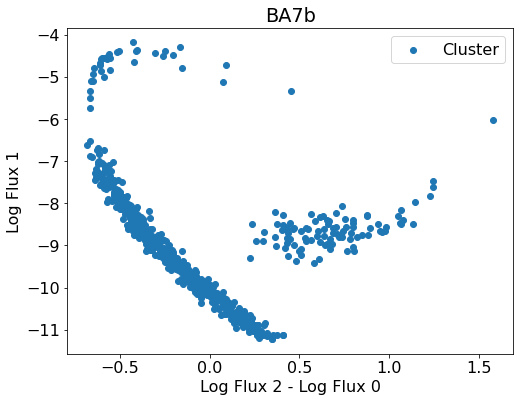

In [627]:
m0, m1, m2 = (np.log10(galaxyba7b['BlueF']), 
              np.log10(galaxyba7b['GreenF']), 
              np.log10(galaxyba7b['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA7b')
10**(8.6/2)

430

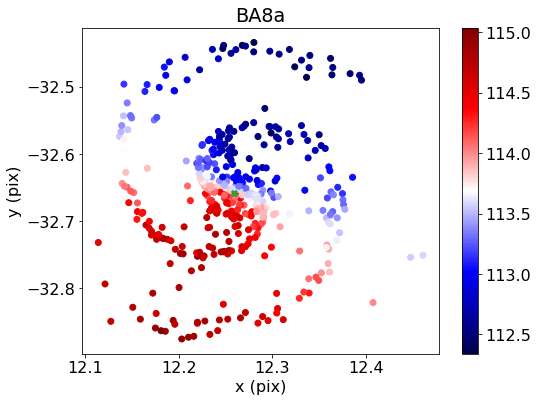

In [628]:
centre = (12.25934408, -32.65742111)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba8a = backstars[d<0.3] # filter to only close ones
plt.scatter(galaxyba8a.X,galaxyba8a.Y,c=galaxyba8a.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA8a');
len(galaxyba8a)

19952.62314968879

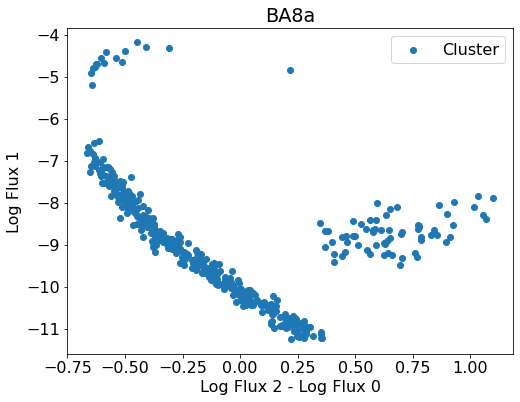

In [629]:
m0, m1, m2 = (np.log10(galaxyba8a['BlueF']), 
              np.log10(galaxyba8a['GreenF']), 
              np.log10(galaxyba8a['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA8a')
10**(8.6/2)

631

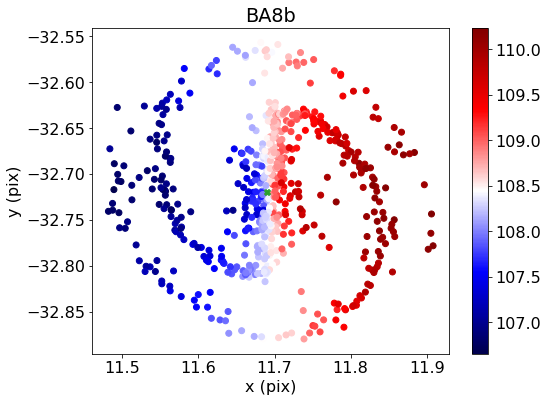

In [630]:
centre = (11.69, -32.72)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba8b = backstars[d<0.3] # filter to only close ones
plt.scatter(galaxyba8b.X,galaxyba8b.Y,c=galaxyba8b.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA8b');
len(galaxyba8b)

17782.794100389227

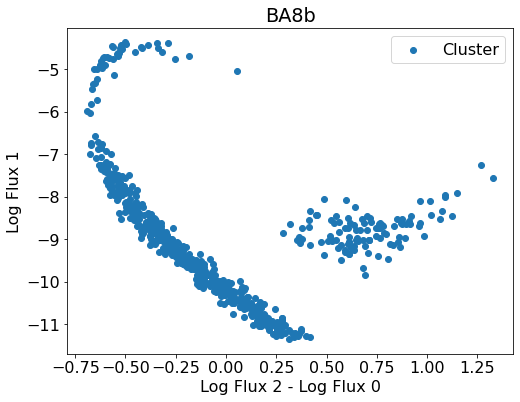

In [631]:
m0, m1, m2 = (np.log10(galaxyba8b['BlueF']), 
              np.log10(galaxyba8b['GreenF']), 
              np.log10(galaxyba8b['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.5,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA8b')
10**(8.5/2)

711

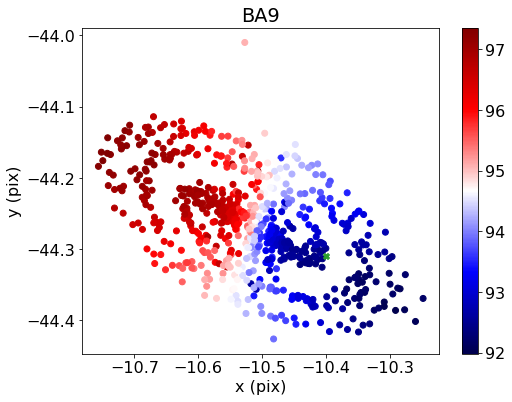

In [632]:
centre = (-10.4, -44.31)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba9 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba9.X,galaxyba9.Y,c=galaxyba9.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA9');
len(galaxyba9)

22387.21138568338

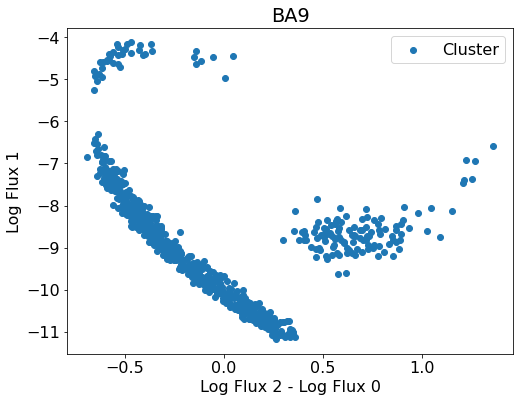

In [633]:
m0, m1, m2 = (np.log10(galaxyba9['BlueF']), 
              np.log10(galaxyba9['GreenF']), 
              np.log10(galaxyba9['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.7,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA9')
10**(8.7/2)

548

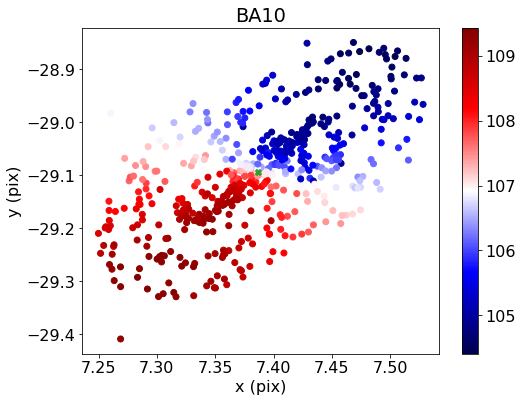

In [634]:
centre = (7.38684234, -29.09425255)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba10 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba10.X,galaxyba10.Y,c=galaxyba10.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA10');
len(galaxyba10)

Text(0.5, 1.0, 'BA10')

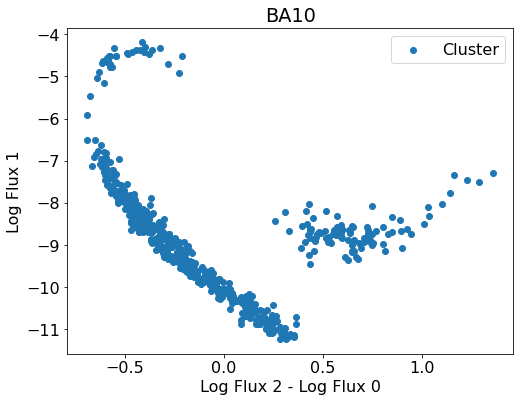

In [635]:
m0, m1, m2 = (np.log10(galaxyba10['BlueF']), 
              np.log10(galaxyba10['GreenF']), 
              np.log10(galaxyba10['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA10')

670

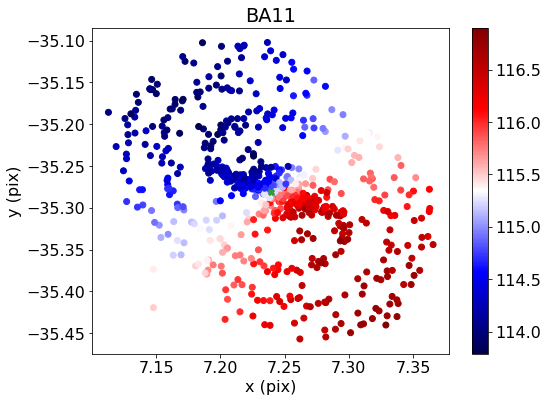

In [636]:
centre = (7.23939239, -35.28150299)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba11 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba11.X,galaxyba11.Y,c=galaxyba11.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA11');
len(galaxyba11)

Text(0.5, 1.0, 'BA11')

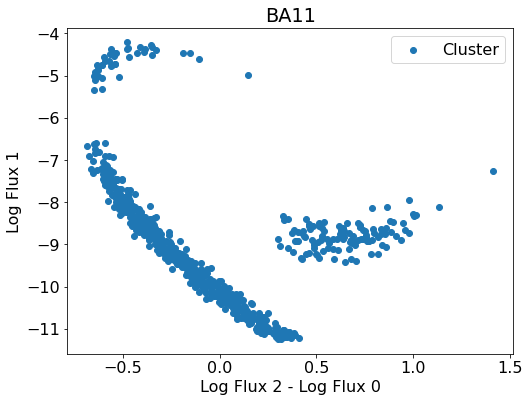

In [637]:
m0, m1, m2 = (np.log10(galaxyba11['BlueF']), 
              np.log10(galaxyba11['GreenF']), 
              np.log10(galaxyba11['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA11')

442

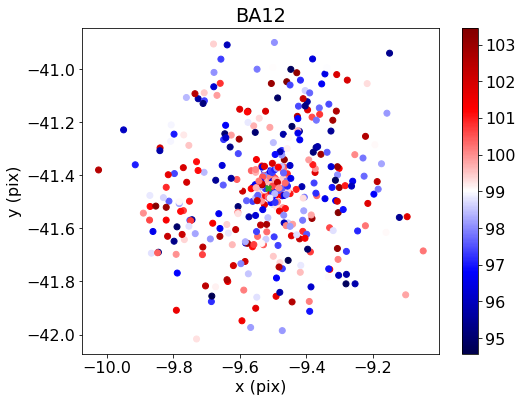

In [638]:
centre = (-9.51475882, -41.44602602)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba12 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba12.X,galaxyba12.Y,c=galaxyba12.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA12');
len(galaxyba12)

Text(0.5, 1.0, 'BA12')

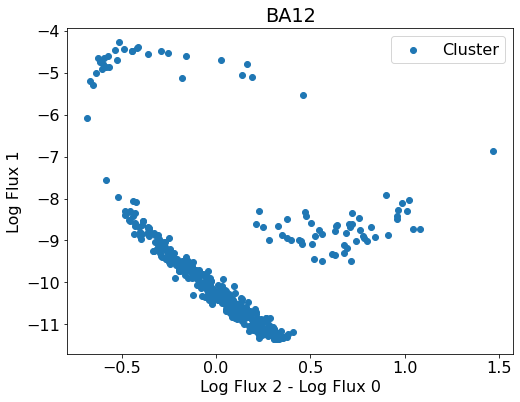

In [639]:
m0, m1, m2 = (np.log10(galaxyba12['BlueF']), 
              np.log10(galaxyba12['GreenF']), 
              np.log10(galaxyba12['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.5,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA12')

629

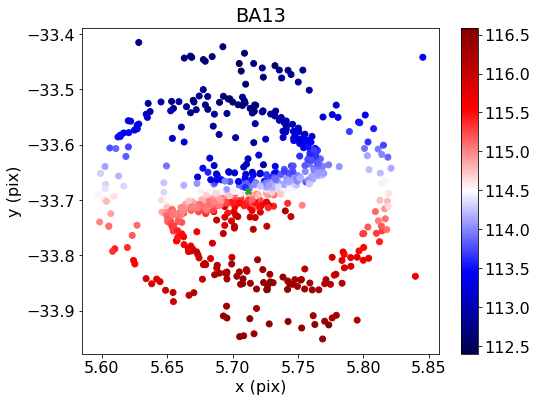

In [640]:
centre = (5.71196328, -33.68406677)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba13 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba13.X,galaxyba13.Y,c=galaxyba13.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA13')
len(galaxyba13)

19952.62314968879

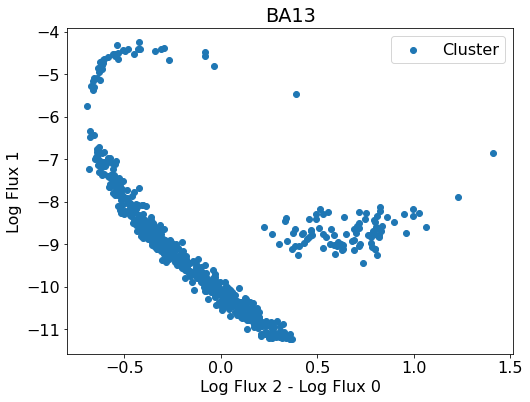

In [641]:
m0, m1, m2 = (np.log10(galaxyba13['BlueF']), 
              np.log10(galaxyba13['GreenF']), 
              np.log10(galaxyba13['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA13')
10**(8.6/2)

403

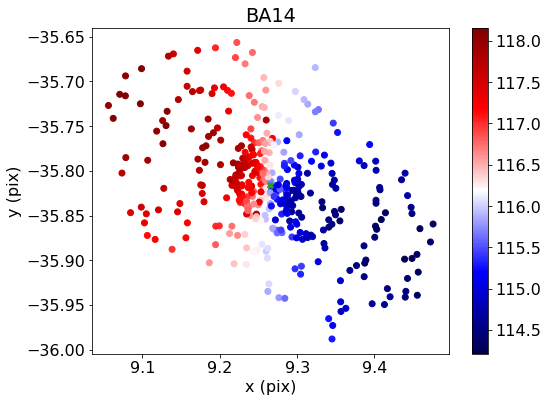

In [642]:
centre = (9.26548462, -35.81633573)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba14 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba14.X,galaxyba14.Y,c=galaxyba14.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA14');
len(galaxyba14)

17782.794100389227

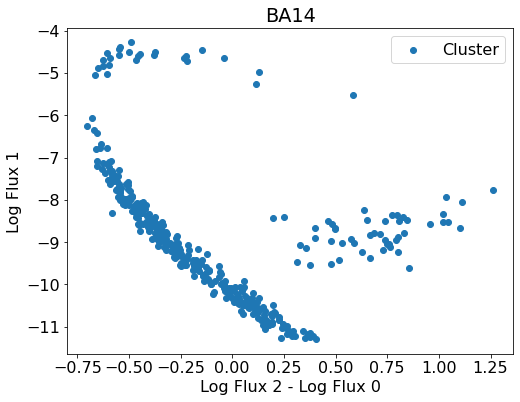

In [643]:
m0, m1, m2 = (np.log10(galaxyba14['BlueF']), 
              np.log10(galaxyba14['GreenF']), 
              np.log10(galaxyba14['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.5,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA14')
10**(8.5/2)

716

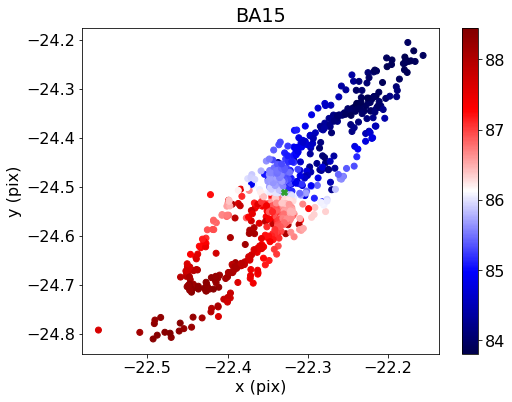

In [644]:
centre = (-22.32923073, -24.51114134)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba15 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba15.X,galaxyba15.Y,c=galaxyba15.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA15');
len(galaxyba15)

11220.18454301963

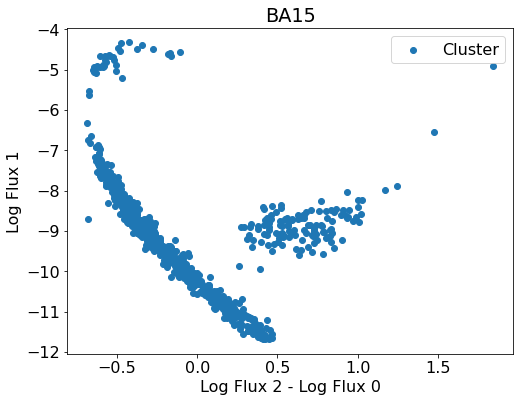

In [645]:
m0, m1, m2 = (np.log10(galaxyba15['BlueF']), 
              np.log10(galaxyba15['GreenF']), 
              np.log10(galaxyba15['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.1,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA15')
10**(8.1/2)

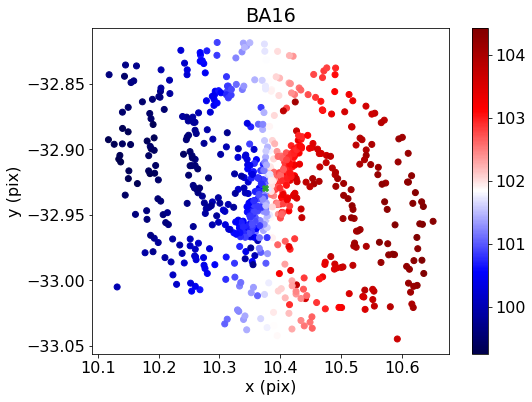

In [646]:
centre = (10.37419578, -32.92942329)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba16 = backstars[d<0.5] # filter to only close ones
plt.scatter(galaxyba16.X,galaxyba16.Y,c=galaxyba16.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA16');

22387.21138568338

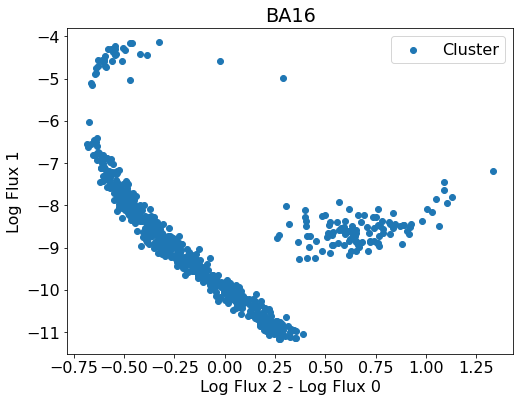

In [647]:
m0, m1, m2 = (np.log10(galaxyba16['BlueF']), 
              np.log10(galaxyba16['GreenF']), 
              np.log10(galaxyba16['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.7,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA16')
10**(8.7/2)

418

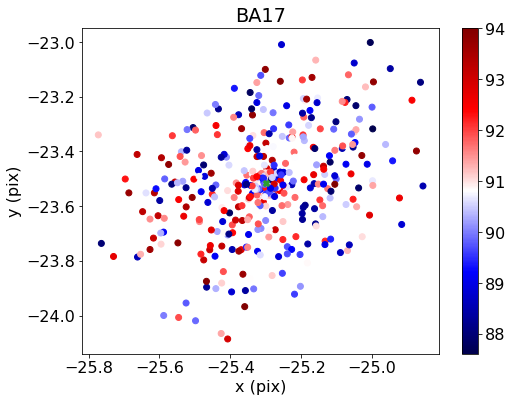

In [648]:
centre = (-25.29921244, -23.51684139)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba17 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba17.X,galaxyba17.Y,c=galaxyba17.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA17');
len(galaxyba17)

14125.375446227554

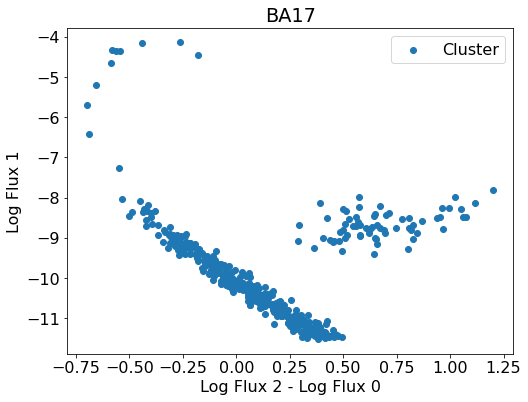

In [649]:
m0, m1, m2 = (np.log10(galaxyba17['BlueF']), 
              np.log10(galaxyba17['GreenF']), 
              np.log10(galaxyba17['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.3,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA17')
10**(8.3/2)

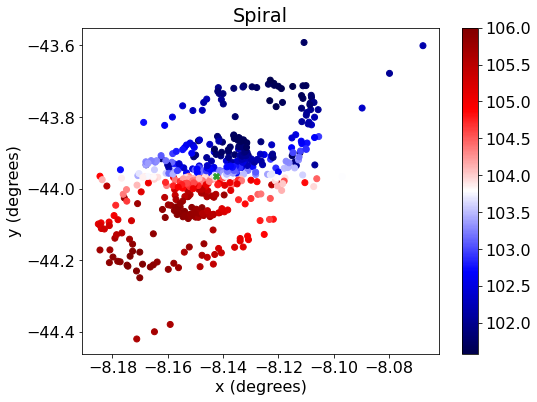

In [650]:
centre = (-8.14270442, -43.96367691)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba18 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba18.X,galaxyba18.Y,c=galaxyba18.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (degrees)')
plt.ylabel('y (degrees)')
plt.title('Spiral');

19952.62314968879

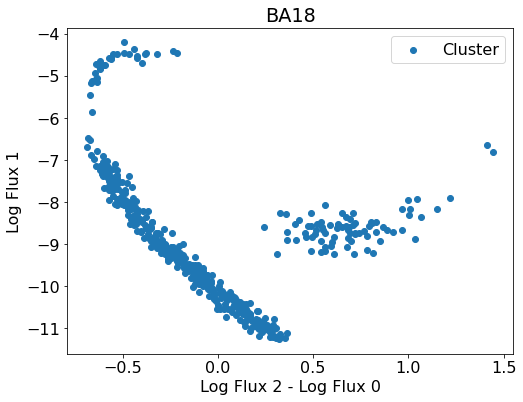

In [651]:
m0, m1, m2 = (np.log10(galaxyba18['BlueF']), 
              np.log10(galaxyba18['GreenF']), 
              np.log10(galaxyba18['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA18')
10**(8.6/2)

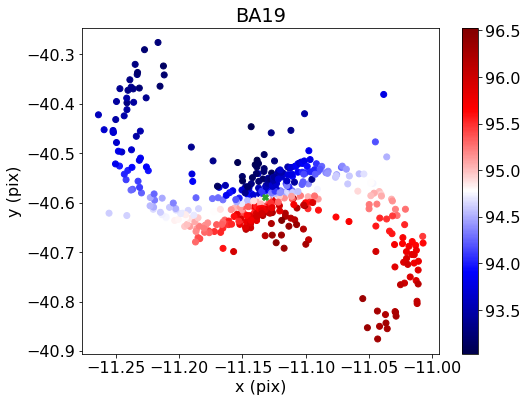

In [652]:
centre = (-11.13208013, -40.58794292)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba19 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba19.X,galaxyba19.Y,c=galaxyba19.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA19');

19952.62314968879

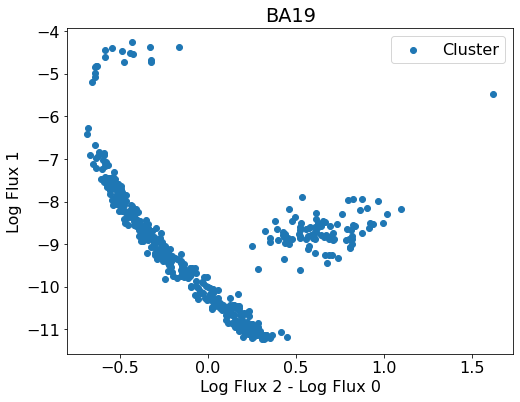

In [653]:
m0, m1, m2 = (np.log10(galaxyba19['BlueF']), 
              np.log10(galaxyba19['GreenF']), 
              np.log10(galaxyba19['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA19')
10**(8.6/2)

568

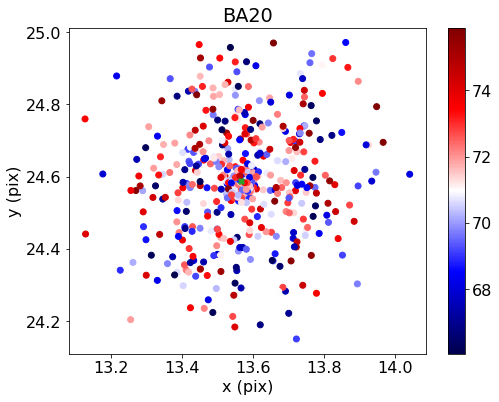

In [654]:
centre = (13.56565183,  24.58746981)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba20 = backstars[d<0.5] # filter to only close ones
plt.scatter(galaxyba20.X,galaxyba20.Y,c=galaxyba20.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA20');
len(galaxyba20)

28183.82931264455

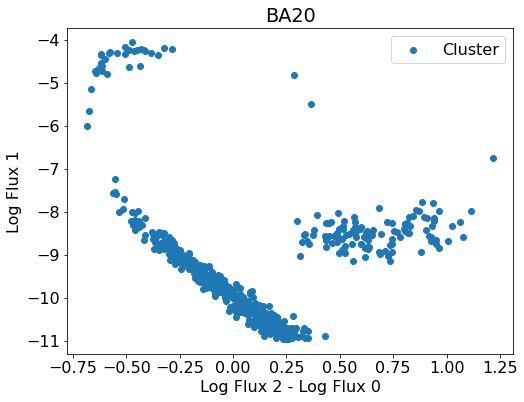

In [655]:
m0, m1, m2 = (np.log10(galaxyba20['BlueF']), 
              np.log10(galaxyba20['GreenF']), 
              np.log10(galaxyba20['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.9,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA20')
10**(8.9/2)

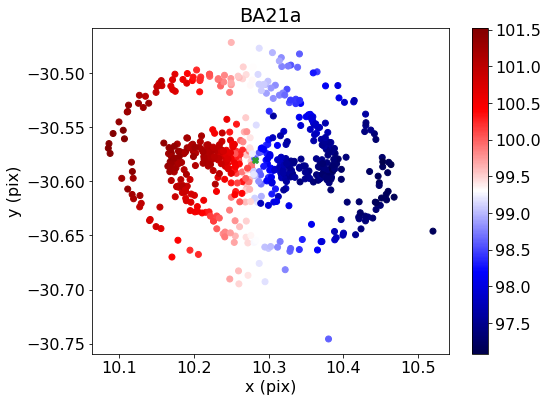

In [656]:
centre = (10.28218743, -30.58019354)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba21a = backstars[d<0.5] # filter to only close ones
plt.scatter(galaxyba21a.X,galaxyba21a.Y,c=galaxyba21a.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA21a');

17782.794100389227

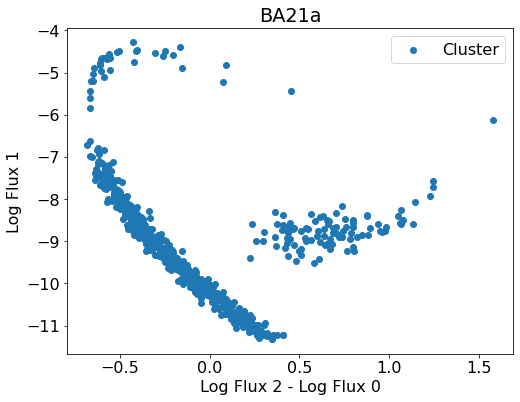

In [657]:
m0, m1, m2 = (np.log10(galaxyba21a['BlueF']), 
              np.log10(galaxyba21a['GreenF']), 
              np.log10(galaxyba21a['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.5,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA21a')
10**(8.5/2)

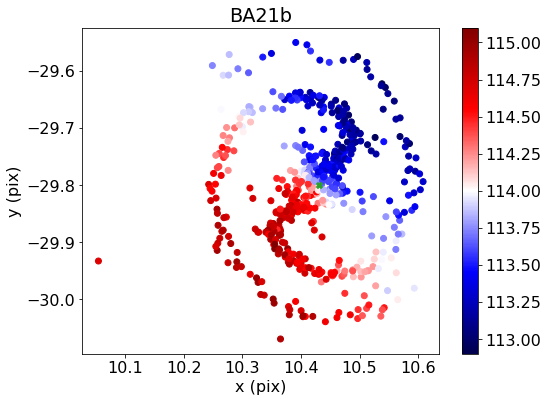

In [658]:
centre = (10.43, -29.8)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba21b = backstars[d<0.4] # filter to only close ones
plt.scatter(galaxyba21b.X,galaxyba21b.Y,c=galaxyba21b.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA21b');

17782.794100389227

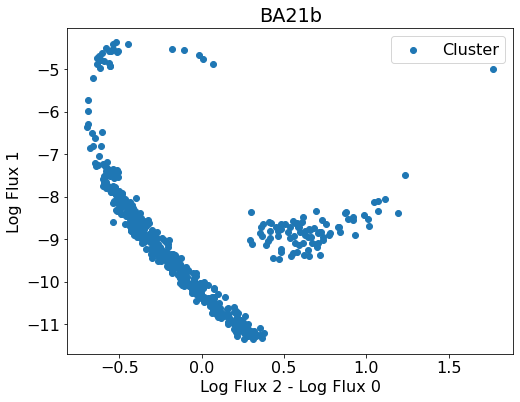

In [659]:
m0, m1, m2 = (np.log10(galaxyba21b['BlueF']), 
              np.log10(galaxyba21b['GreenF']), 
              np.log10(galaxyba21b['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.5,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA21b')
10**(8.5/2)

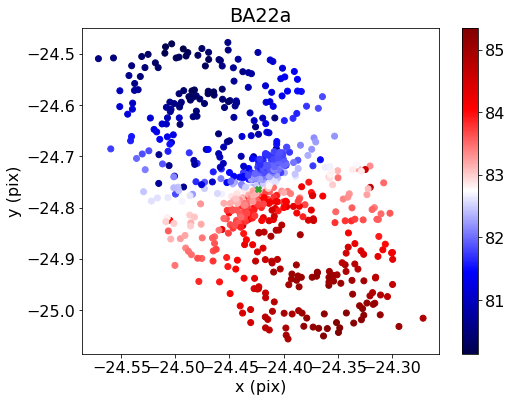

In [660]:
centre = (-24.42321423, -24.76371036)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba22a = backstars[d<0.3] # filter to only close ones
plt.scatter(galaxyba22a.X,galaxyba22a.Y,c=galaxyba22a.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA22a');

11220.18454301963

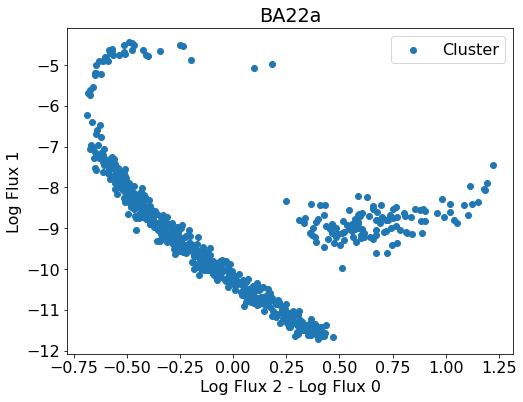

In [661]:
m0, m1, m2 = (np.log10(galaxyba22a['BlueF']), 
              np.log10(galaxyba22a['GreenF']), 
              np.log10(galaxyba22a['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.1,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA22a')
10**(8.1/2)

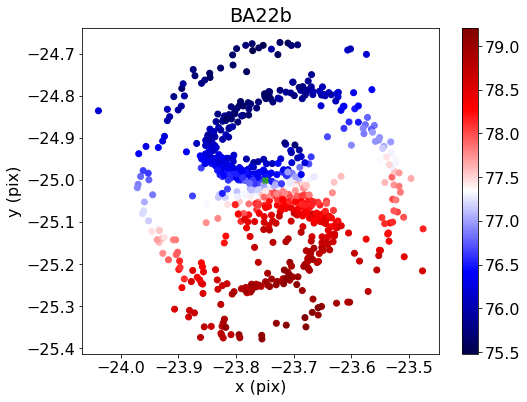

In [662]:
centre = (-23.75, -25)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba22b = backstars[d<0.5] # filter to only close ones
plt.scatter(galaxyba22b.X,galaxyba22b.Y,c=galaxyba22b.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA22b');

14125.375446227554

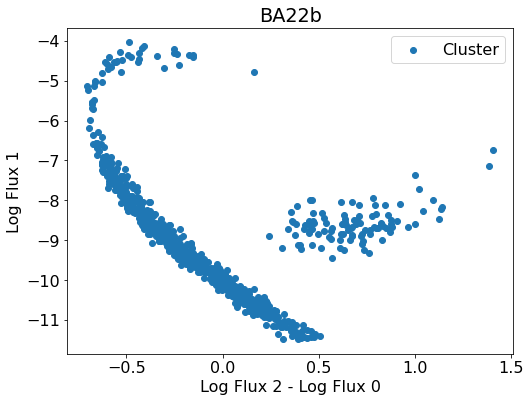

In [663]:
m0, m1, m2 = (np.log10(galaxyba22b['BlueF']), 
              np.log10(galaxyba22b['GreenF']), 
              np.log10(galaxyba22b['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.3,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA22b')
10**(8.3/2)

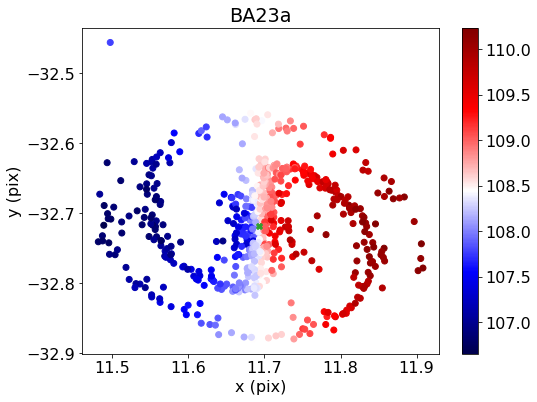

In [664]:
centre = (11.69323639, -32.71761962)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba23a = backstars[d<0.4] # filter to only close ones
plt.scatter(galaxyba23a.X,galaxyba23a.Y,c=galaxyba23a.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA23a');

19952.62314968879

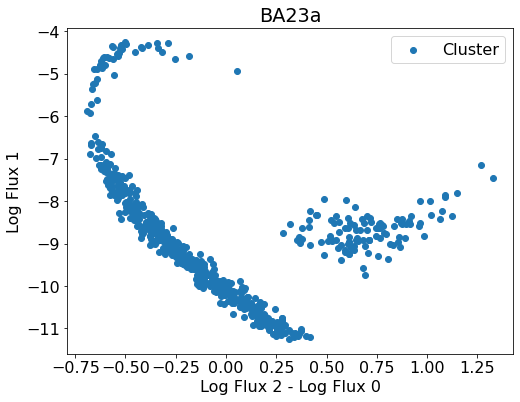

In [665]:
m0, m1, m2 = (np.log10(galaxyba23a['BlueF']), 
              np.log10(galaxyba23a['GreenF']), 
              np.log10(galaxyba23a['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA23a')
10**(8.6/2)

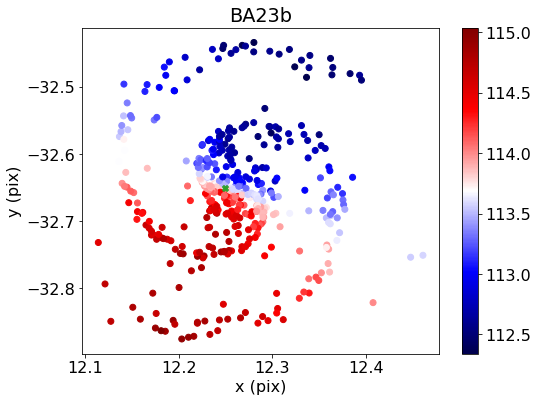

In [666]:
centre = (12.25, -32.65)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba23b = backstars[d<0.3] # filter to only close ones
plt.scatter(galaxyba23b.X,galaxyba23b.Y,c=galaxyba23b.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA23b');

19952.62314968879

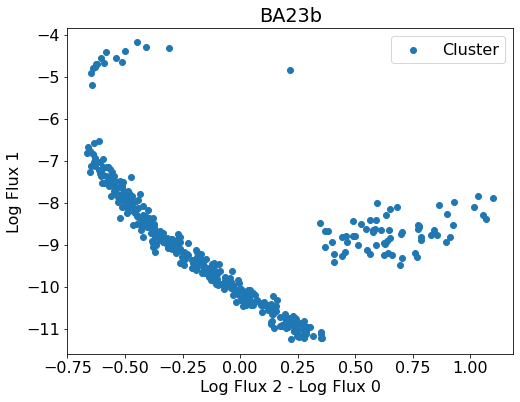

In [667]:
m0, m1, m2 = (np.log10(galaxyba23b['BlueF']), 
              np.log10(galaxyba23b['GreenF']), 
              np.log10(galaxyba23b['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA23b')
10**(8.6/2)

In [669]:
# #rotation curve
# A = galaxyr1.X-centre[0]
# print (A)

# B = galaxyr1.Y-centre[0]
# print(B)

In [671]:
centre = (10.43, -29.8)
#galaxyba21b = backstars[d<0.4]
A21b = galaxyba21b.X-centre[0]
print (A21b)








B21b = galaxyba21b.Y-centre[0]
print(B21b)

5654    0.0191
5655    0.0060
5656    0.0350
5657    0.0248
5658    0.0709
         ...  
6209   -0.1535
6210   -0.1812
6211    0.1327
6212    0.1634
6213   -0.1665
Name: X, Length: 560, dtype: float64
5654   -40.2372
5655   -40.2204
5656   -40.0951
5657   -40.2001
5658   -40.2427
         ...   
6209   -40.0377
6210   -40.0210
6211   -40.3836
6212   -40.4105
6213   -40.0976
Name: Y, Length: 560, dtype: float64


Text(0, 0.5, 'Radial Velocity (km/s)')

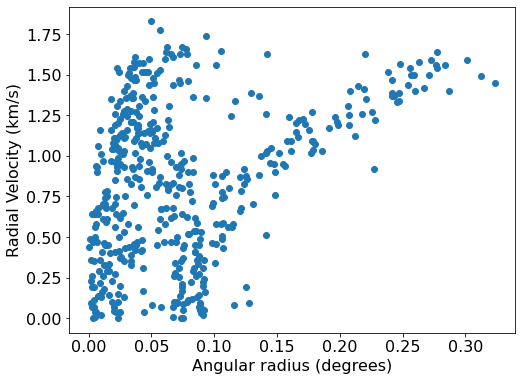

In [707]:
centre = (-11.13208013, -40.58794292)
Aba19 = galaxyba19.X-centre[0]
# print (Aba19)

distba19=19952

Bba19 = galaxyba19.Y-centre[1]
# print(Bba19)


Rba19 = np.sqrt((Aba19**2) + (Bba19**2))
Radpc=distba19*np.tan(Rba19)

# plt.scatter(abs(Radpc),abs(galaxyba19.RadialVelocity))
radvel=galaxyba19.RadialVelocity - 94.70071881606766

plt.scatter(abs(Rba19),abs(radvel))

# plt.scatter(abs(Bba19),abs(galaxyba19.RadialVelocity))

# plt.xlabel('Galaxy Radius (pc)')
plt.xlabel('Angular radius (degrees)')
plt.ylabel('Radial Velocity (km/s)')
# plt.xlim(20000,90000)

In [706]:
np.mean(galaxyba19.RadialVelocity)

94.70071881606766

In [685]:
print(Rba19)

10240    29.486420
10241    29.459320
10242    29.506095
10243    29.455831
10244    29.456020
           ...    
10708    29.718258
10709    29.743854
10710    29.209429
10711    29.158376
10712    29.143743
Length: 473, dtype: float64


In [687]:
print(Aba19)

10240   -0.00092
10241   -0.00142
10242    0.06648
10243    0.02588
10244    0.00588
          ...   
10708    0.09068
10709    0.08918
10710   -0.07992
10711   -0.09552
10712   -0.08482
Name: X, Length: 473, dtype: float64


In [688]:
print(Bba19)

10240   -29.48642
10241   -29.45932
10242   -29.50602
10243   -29.45582
10244   -29.45602
           ...   
10708   -29.71812
10709   -29.74372
10710   -29.20932
10711   -29.15822
10712   -29.14362
Name: Y, Length: 473, dtype: float64


In [693]:
galaxyba19.Y-centre[1]

10240   -0.030557
10241   -0.003457
10242   -0.050157
10243    0.000043
10244   -0.000157
           ...   
10708   -0.262257
10709   -0.287857
10710    0.246543
10711    0.297643
10712    0.312243
Name: Y, Length: 473, dtype: float64

In [699]:
galaxyba19

Name        X        Y         BlueF        GreenF  \
10240  BackS134373 -11.1330 -40.6185  2.892000e-20  3.702000e-20   
10241  BackS134374 -11.1335 -40.5914  3.126000e-20  3.939000e-20   
10242  BackS134376 -11.0656 -40.6381  1.999000e-20  2.809000e-20   
10243  BackS134377 -11.1062 -40.5879  6.848000e-18  5.936000e-18   
10244  BackS134382 -11.1262 -40.5881  8.969000e-14  6.372000e-14   
...            ...      ...      ...           ...           ...   
10708  BackS135287 -11.0414 -40.8502  1.721000e-18  2.678000e-18   
10709  BackS135288 -11.0429 -40.8758  5.863000e-20  7.017000e-20   
10710  BackS135289 -11.2120 -40.3414  8.038000e-18  6.745000e-18   
10711  BackS135290 -11.2276 -40.2903  1.140000e-18  1.941000e-18   
10712  BackS135291 -11.2169 -40.2757  2.261000e-18  4.097000e-18   

               RedF  Parallax  RadialVelocity  Variable?  
10240  4.333000e-20     0.000           95.95          0  
10241  4.575000e-20     0.001           94.70          0  
10242  3.862000e-20    -0.000           95.69          0  
10243  3.131000e-18    -0.000           95.08          0  
10244  2.332000e-14     0.001           94.74          0  
...             ...       ...             ...        ...  
10708  4.735000e-18     0.000           96.24          0  
10709  7.397000e-20     0.000           96.29          0  
10710  3.430000e-18     0.001           93.20          0  
10711  4.237000e-18    -0.001           93.21          0  
10712  9.952000e-18    -0.000           93.25          0  

[473 rows x 9 columns]

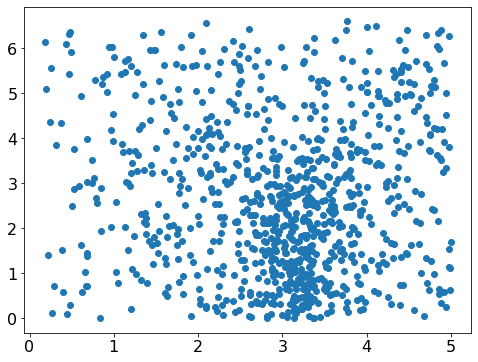

In [709]:
centre = (-10.94783942, -17.60958602)

Af3 = galaxyf3.X-centre[0]
# print (Af3)



Bf3 = galaxyf3.Y-centre[1]
# print(Bf3)

Rf3 = np.sqrt((Af3**2) + (Bf3**2))

avradv=galaxyf3.RadialVelocity --8.003665943600868

plt.scatter(abs(Rf3),abs(avradv))

In [710]:
np.mean(galaxyba22b.RadialVelocity)

77.31606534090908

Text(0, 0.5, 'Radial Velocity (km/s)')

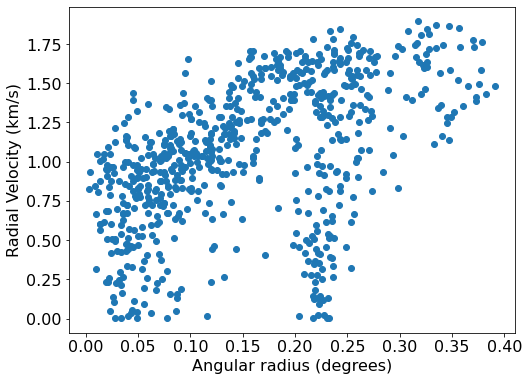

In [714]:
centre = (-23.75, -25)
Aba22b = galaxyba22b.X-centre[0]
# print (Aba19)

distba22b=14125

Bba22b = galaxyba22b.Y-centre[1]
# print(Bba19)


Rba22b = np.sqrt((Aba22b**2) + (Bba22b**2))
Radpc=distba22b*np.tan(Rba22b)

# plt.scatter(abs(Radpc),abs(galaxyba19.RadialVelocity))
radvel=galaxyba22b.RadialVelocity - 77.31606534090908

plt.scatter(abs(Rba22b),abs(radvel))

# plt.scatter(abs(Bba19),abs(galaxyba19.RadialVelocity))

# plt.xlabel('Galaxy Radius (pc)')
plt.xlabel('Angular radius (degrees)')
plt.ylabel('Radial Velocity (km/s)')
# plt.xlim(20000,90000)